In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers

imports_path = "src//imports.ipynb"

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in global vars")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [5]:
import sys
n_epochs = 300
n_critic = 10
opt_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0

if sys.platform == "win32":
    jit_compile=True
elif sys.platform == "linux":
    jit_compile=False
else:
    raise RuntimeError("Did not recognize the system platform and therefore does not know how to initialize the storage directory path.")

retrain = True

In [6]:
tg = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = False, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile)

tg_qt = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile)

tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile)

ctg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile,
                ctgan=True)

# data_train_changed_dtypes = data_train.copy()
# data_train_changed_dtypes = data_train_changed_dtypes.astype({"capital.gain" : float, "capital.loss" : float})
# tg_qt_dtype = TabGAN(data_train_changed_dtypes, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
#               quantile_transformation_int = True, quantile_rand_transformation = False,
#              noise_discrete_unif_max = noise_discrete_unif_max)  

In [ ]:
ctg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=False,
                ctgan=True, ctgan_binomial_loss=True, ctgan_log_frequency=True, tf_data_use=False)
ctg_qtr.train(300, batch_size=500, restart_training=False, progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

[0.000312034681 0.0996406823 0.000236901513 ... 0.00875895191 0.00040255129 0.00141054601] 1 - max_val: 9.81092453e-05 [-8.07239628 -2.30618477 -8.34786606 ... -4.737679 -7.81768799 -6.5637784] min_val: -14.6461983 total_loss: -3.60346818
[0.000738919247 3.63062318e-05 0.0249121897 ... 0.0346238725 0.00196277397 0.018932892] 1 - max_val: 2.68220901e-06 [-7.2103219 -10.2235212 -3.69239807 ... -3.36321187 -6.23339653 -3.96685457] min_val: -16.0464649 total_loss: -3.34696412
[8.41166111e-05 0.937718213 0.10493701 ... 0.0337554887 0.000124204656 0.108276583] 1 - max_val: 0.000209927559 [-9.3833065 -0.0643057898 -2.25439501 ... -3.38861227 -8.99358 -2.22306633] min_val: -12.9674196 total_loss: -3.25284648
[0.89168793 0.00125672168 0.2317781 ... 0.931387842 0.142953828 0.338518381] 1 - max_val: 6.67572e-06 [-0.114639059 -6.67924881 -1.46197486 ... -0.0710795 -1.94523358 -1.08317685] min_val: -16.2285881 total_loss: -3.18617916
[0.0734402 0.646782696 0.974205732 ... 0.148033336 0.000564935559

[0.000131257606 0.00589356339 0.00291217142 ... 0.998078763 0.20517391 0.9941082] 1 - max_val: 2.14576721e-06 [-8.93834877 -5.13389444 -5.83885622 ... -0.00192308449 -1.58389735 -0.00590922497] min_val: -16.2454433 total_loss: -2.33033037
[0.00455485331 0.990421057 0.00397465145 ... 0.998705745 0.999943793 0.999760687] 1 - max_val: 3.21865082e-06 [-5.39156199 -0.00962511636 -5.5278182 ... -0.00129509356 -5.62087589e-05 -0.000239341287] min_val: -12.435111 total_loss: -2.32759976
[0.886401534 0.992047369 0.21334222 ... 8.68625284e-05 0.99404335 0.992286205] 1 - max_val: 1.31130219e-06 [-0.120585233 -0.00798442122 -1.54485774 ... -9.35118389 -0.00597446132 -0.0077437] min_val: -17.3145046 total_loss: -2.54643393
[5.97890715e-09 0.995090306 0.976611376 ... 2.23565189e-06 0.526780903 0.733521521] 1 - max_val: 2.50339508e-06 [-18.9350281 -0.00492178649 -0.0236664787 ... -13.0109777 -0.640970588 -0.309898347] min_val: -18.9350281 total_loss: -2.51415896
[0.00348365679 0.136379898 0.986654222

[0.0407524928 0.132401973 0.364025176 ... 0.227593854 0.954187 0.871759474] 1 - max_val: 6.55651093e-07 [-3.20023823 -2.02191281 -1.01053226 ... -1.48019254 -0.0468956344 -0.137241721] min_val: -14.7235546 total_loss: -2.16552353
[0.101355687 0.63862741 0.999219656 ... 0.000113543181 0.995913327 0.999896646] 1 - max_val: 0 [-2.28911924 -0.448434085 -0.00078064861 ... -9.08332729 -0.00409504632 -0.000103359795] min_val: -14.779789 total_loss: -2.15245461
[0.995243132 0.206156209 0.29597044 ... 0.999893665 3.10935525e-06 0.999953687] 1 - max_val: 0 [-0.00476821791 -1.57912111 -1.21749568 ... -0.00010634034 -12.6810951 -4.63138822e-05] min_val: -14.6289701 total_loss: -2.28810382
[0.00242036697 0.909818411 0.991701424 ... 0.999214947 0.00296639348 0.999581039] 1 - max_val: 1.1920929e-07 [-6.02383614 -0.0945102498 -0.00833320059 ... -0.000785361102 -5.82040834 -0.000419048825] min_val: -16.5007324 total_loss: -2.16359377
[0.045843631 0.993798792 0.34957 ... 0.00151375111 0.00697150081 0.99

[0.0168825015 0.601339459 6.15777753e-05 ... 0.00372192427 0.55182755 0.00150982093] 1 - max_val: 0 [-4.08147764 -0.508595705 -9.6952095 ... -5.59351444 -0.594519675 -6.49576426] min_val: -26.3908672 total_loss: -2.20904
[0.012852327 0.999150813 0.00910876412 ... 0.729615331 0.00636017602 0.928591] 1 - max_val: 3.57627869e-07 [-4.3542304 -0.000849548145 -4.69851828 ... -0.31523782 -5.0576992 -0.0740868822] min_val: -14.9463682 total_loss: -2.01485538
[0.000511719962 0.603323698 0.999125063 ... 0.290283769 0.0224146433 0.00642999494] 1 - max_val: 3.57627869e-07 [-7.57773304 -0.505301416 -0.000875319587 ... -1.23689628 -3.79804087 -5.04678154] min_val: -14.4073792 total_loss: -2.16341305
[0.0403920747 3.99683404e-06 0.106016763 ... 0.226791039 0.367347449 0.00320712733] 1 - max_val: 0 [-3.2091217 -12.4300079 -2.24415803 ... -1.48372626 -1.0014472 -5.74237967] min_val: -13.1144905 total_loss: -2.08836174
[0.195696071 0.000566962 0.991185606 ... 3.50873e-05 0.614916384 0.15615581] 1 - max_

[0.824471 0.32170859 0.0244599637 ... 0.17036517 0.00151138112 0.975490868] 1 - max_val: 2.92062759e-06 [-0.19301331 -1.13410914 -3.71071768 ... -1.76981115 -6.49473143 -0.0248144809] min_val: -13.9026203 total_loss: -2.0444243
[0.731672347 0.0220271926 0.000134400776 ... 0.731766403 0.999996245 0.36802116] 1 - max_val: 1.1920929e-07 [-0.312422484 -3.81547761 -8.9146843 ... -0.312293947 -3.75509967e-06 -0.999614835] min_val: -21.7298336 total_loss: -2.0327239
[0.030228164 0.408696592 0.939537525 ... 0.963261306 0.0146503169 0.165856227] 1 - max_val: 0 [-3.49898124 -0.894782245 -0.0623675175 ... -0.0374305584 -4.2232933 -1.79663396] min_val: -13.5151215 total_loss: -2.14824367
[0.635514677 2.40185673e-05 0.00226777652 ... 0.969436824 0.0445736647 0.996672034] 1 - max_val: 0 [-0.453320086 -10.6366835 -6.0889554 ... -0.03103997 -3.11061215 -0.00333351572] min_val: -15.7358418 total_loss: -1.71398699
[0.996987343 0.0114737246 0.34911564 ... 0.0127772652 0.999085307 0.971682191] 1 - max_val

[0.999983847 0.174755782 0.94625169 ... 0.000214012282 0.654153466 0.298063755] 1 - max_val: 3.57627869e-07 [-1.61529897e-05 -1.74436581 -0.0552466884 ... -8.4494772 -0.424413294 -1.21044791] min_val: -14.1212091 total_loss: -1.75937104
[0.0994875208 0.998919725 0.521569431 ... 0.0487388596 0.876660943 0.729141235] 1 - max_val: 0 [-2.30772305 -0.00108085852 -0.650912881 ... -3.02127862 -0.131634966 -0.315887839] min_val: -14.5429516 total_loss: -1.74760866
[0.991108119 0.318230569 0.301289141 ... 0.999734163 0.893881857 0.675851583] 1 - max_val: 0 [-0.00893164892 -1.14497912 -1.19968486 ... -0.000265872048 -0.112181664 -0.391781777] min_val: -13.075264 total_loss: -1.80813563
[0.0118172411 0.369525254 0.0172271878 ... 0.9988572 0.122424789 0.981899261] 1 - max_val: 0 [-4.43819571 -0.995536208 -4.06126642 ... -0.00114345329 -2.10025835 -0.0182665605] min_val: -16.6116047 total_loss: -1.76294279
[0.318875045 0.999631822 0.444412291 ... 0.991378903 0.137626767 0.99995327] 1 - max_val: 1.1

[0.0575570837 0.00858544838 8.55029575e-05 ... 0.987944186 0.999937057 0.643728256] 1 - max_val: 0 [-2.85497808 -4.75768661 -9.36696 ... -0.0121290749 -6.29444839e-05 -0.440478593] min_val: -15.0608158 total_loss: -1.83942962
[0.297239959 0.792275667 0.990522802 ... 0.841985643 0.966085494 0.971216202] 1 - max_val: 1.96695328e-06 [-1.21321559 -0.232845888 -0.00952239241 ... -0.171992317 -0.0345029458 -0.0292061772] min_val: -16.4606533 total_loss: -1.65918171
[0.988577187 0.584908962 0.00167528051 ... 0.0908569321 0.846927285 0.0663664639] 1 - max_val: 0 [-0.0114885541 -0.53629905 -6.39177465 ... -2.39846921 -0.166140437 -2.71256351] min_val: -14.8969908 total_loss: -2.04586983
[0.860683143 0.0570107847 0.25912866 ... 0.99937588 0.173025906 0.584968925] 1 - max_val: 0 [-0.150028855 -2.86451483 -1.35043061 ... -0.000624315056 -1.75431395 -0.536196589] min_val: -12.3437729 total_loss: -1.71728969
[0.942252934 0.931035042 0.989361465 ... 0.0649328157 0.998369455 0.999629736] 1 - max_val: 

[0.000258436776 0.376468599 0.998926163 ... 0.900843561 0.999887168 0.998767495] 1 - max_val: 1.1920929e-07 [-8.26085949 -0.976920605 -0.00107441423 ... -0.104423665 -0.000112837959 -0.00123326504] min_val: -19.198185 total_loss: -1.82615602
[0.0243184939 0.524859309 0.997654 ... 0.969479859 0.999938905 0.999984503] 1 - max_val: 2.38418579e-07 [-3.71651816 -0.644625068 -0.00234873523 ... -0.0309955794 -6.10966308e-05 -1.54973277e-05] min_val: -19.3769855 total_loss: -1.43609989
[0.88729167 0.03051937 0.999954522 ... 0.9987064 0.00587285729 0.98936981] 1 - max_val: 0 [-0.119581521 -3.48939371 -4.54793771e-05 ... -0.00129443698 -5.13741398 -0.0106870942] min_val: -14.6743269 total_loss: -1.65895927
[0.00283304788 0.00240582833 0.092539005 ... 0.799160123 0.886992276 0.989764869] 1 - max_val: 0 [-5.86640215 -6.02986097 -2.38012505 ... -0.224193946 -0.119919 -0.0102878697] min_val: -22.8812752 total_loss: -1.79300976
[0.999542713 0.999985 0.920460105 ... 0.996340454 0.801901817 0.999177217

[0.975673079 0.999359548 0.999998271 ... 0.883984864 0.413184524 0.999922] 1 - max_val: 0 [-0.0246277079 -0.00064065709 -1.72853618e-06 ... -0.123315342 -0.883861 -7.80255214e-05] min_val: -30.627697 total_loss: -1.56372857
[0.991654515 0.249418586 0.924140275 ... 0.389289767 0.0898722932 0.999990582] 1 - max_val: 1.1920929e-07 [-0.00838050339 -1.38862276 -0.078891404 ... -0.943431318 -2.40936565 -9.41757844e-06] min_val: -12.5439873 total_loss: -1.40175724
[0.672464669 0.553815782 0.00277097244 ... 5.65449687e-10 0.462330252 0.000122099707] 1 - max_val: 0 [-0.396805704 -0.59092319 -5.88855696 ... -21.2934 -0.771475792 -9.01067257] min_val: -21.2934 total_loss: -1.94920146
[0.000162604323 0.00029776743 0.993204355 ... 0.5893538 0.999374449 0.906996667] 1 - max_val: 1.1920929e-07 [-8.72419071 -8.11919785 -0.00681884028 ... -0.528728604 -0.000625746499 -0.0976165] min_val: -23.9788132 total_loss: -1.55061018
[0.999973655 0.0112298103 0.287847847 ... 0.0899866596 0.958850503 0.20531787] 1

[0.231593221 0.985396802 0.987051308 ... 0.00127712218 0.947581649 0.99963969] 1 - max_val: 0 [-1.46277285 -0.0147108734 -0.0130332569 ... -6.66314602 -0.053842172 -0.000360375] min_val: -17.184042 total_loss: -1.47380936
[0.999186695 0.882288396 0.997911096 ... 0.999421358 0.999989033 0.00480360119] 1 - max_val: 0 [-0.000813636289 -0.125236288 -0.00209108926 ... -0.000578809355 -1.09673147e-05 -5.3383894] min_val: -18.2901821 total_loss: -1.50019896
[0.99990958 0.982925057 0.0163778737 ... 0.997632504 0.441660345 0.938674092] 1 - max_val: 0 [-9.04243352e-05 -0.0172224 -4.11182404 ... -0.0023703035 -0.817214131 -0.0632869378] min_val: -14.5029087 total_loss: -1.35761559
[0.981602848 0.999560297 0.0446896702 ... 0.72083348 0.188366964 0.997382939] 1 - max_val: 0 [-0.0185684841 -0.000439800177 -3.10801291 ... -0.32734713 -1.66936326 -0.00262049166] min_val: -14.9041176 total_loss: -1.31036747
[0.972619593 0.999968231 0.0281246509 ... 0.00209267833 0.988596141 0.998015761] 1 - max_val: 0 

[0.994757235 0.00214708247 0.996948302 ... 0.999038458 0.000583974645 0.00576619618] 1 - max_val: 1.1920929e-07 [-0.00525655644 -6.14364529 -0.00305636413 ... -0.000962004706 -7.44565296 -5.15574265] min_val: -16.4430199 total_loss: -1.29862714
[0.00343861966 0.999999285 0.0151704475 ... 0.989206672 0.793967247 0.999996] 1 - max_val: 0 [-5.67268515 -7.15256e-07 -4.18840599 ... -0.0108519988 -0.230713069 -3.99351939e-06] min_val: -12.109252 total_loss: -1.14320159
[0.00254208059 0.969458103 0.250281125 ... 0.00149935205 0.10091234 0.997893691] 1 - max_val: 0 [-5.97477245 -0.0310180206 -1.38517046 ... -6.50272226 -2.29350305 -0.00210853037] min_val: -13.8286362 total_loss: -1.12527859
[0.991955638 0.310861528 0.999876499 ... 0.0562756322 0.76153934 0.984553337] 1 - max_val: 0 [-0.00807689223 -1.16840768 -0.000123508449 ... -2.87749362 -0.272413462 -0.0155672058] min_val: -16.0001621 total_loss: -1.36669743
[0.946099699 0.813990414 0.626116812 ... 0.853861511 0.896412849 0.917028189] 1 - 

[0.998334765 0.998374641 0.0435596555 ... 0.999952614 0.146103412 0.999973118] 1 - max_val: 0 [-0.00166662259 -0.00162668142 -3.13362384 ... -4.73868167e-05 -1.92344058 -2.68820568e-05] min_val: -20.4989223 total_loss: -1.06934857
[0.947307765 0.989482939 0.396107405 ... 0.844642699 0.00879263 0.418905318] 1 - max_val: 0 [-0.0541312471 -0.0105727557 -0.926069856 ... -0.168841586 -4.73384142 -0.870110393] min_val: -18.7065372 total_loss: -0.97406584
[0.89866066 0.977588058 0.112821087 ... 0.969407201 0.46828711 0.87283361] 1 - max_val: 0 [-0.106849782 -0.0226669069 -2.181952 ... -0.0310705267 -0.758673668 -0.136010334] min_val: -14.5234118 total_loss: -1.23082387
[0.999999106 0.998918891 0.992949724 ... 0.885586441 0.999538481 0.999998] 1 - max_val: 0 [-8.9407007e-07 -0.00108169392 -0.00707524642 ... -0.121505208 -0.000461625285 -2.02656e-06] min_val: -16.100235 total_loss: -1.06876504
[0.963154316 0.999828756 0.000502222858 ... 0.637171745 0.6969468 0.999737561] 1 - max_val: 0 [-0.0375

[0.978094459 0.932827473 0.0116435718 ... 0.666778803 0.860624909 0.598602712] 1 - max_val: 0 [-0.0221490301 -0.0695350096 -4.45300102 ... -0.405296922 -0.150096521 -0.513157129] min_val: -13.7111931 total_loss: -1.08457375
[0.00897290558 0.999992 0.841851771 ... 0.999995589 0.834771097 0.99837333] 1 - max_val: 0 [-4.7135458 -7.98705423e-06 -0.172151327 ... -4.41075326e-06 -0.180597723 -0.00162799482] min_val: -15.072526 total_loss: -0.896405935
[0.527722895 0.999999881 6.29142742e-05 ... 0.0441496074 0.99999845 0.00192800793] 1 - max_val: 0 [-0.639183939 -1.19209304e-07 -9.67373753 ... -3.12017131 -1.54972201e-06 -6.25126791] min_val: -20.137619 total_loss: -1.10150588
[0.999768794 0.999999344 0.999812901 ... 0.971856892 0.901313305 0.985357165] 1 - max_val: 0 [-0.000231233149 -6.5565132e-07 -0.000187116486 ... -0.0285467152 -0.103902347 -0.0147510991] min_val: -14.2224503 total_loss: -1.03571641
[0.0105612436 0.999899328 0.388404161 ... 0.99948746 0.999564171 0.999961] 1 - max_val: 0

[0.990775526 0.999989629 0.00330702239 ... 0.948955059 0.999654889 0.987128258] 1 - max_val: 0 [-0.0092672836 -1.03712619e-05 -5.71170712 ... -0.0523938388 -0.000345170469 -0.0129553005] min_val: -13.2306137 total_loss: -0.812906206
[0.999891639 0.421793282 0.491355628 ... 0.921647608 0.999811053 0.257395595] 1 - max_val: 0 [-0.000108367116 -0.863239944 -0.710587144 ... -0.0815923288 -0.000188964579 -1.35714114] min_val: -13.8767242 total_loss: -0.896550238
[0.999948561 0.00521292 0.999514103 ... 0.998824358 0.0391434059 0.782974] 1 - max_val: 0 [-5.14401327e-05 -5.25661516 -0.000486015138 ... -0.00117633364 -3.24052334 -0.244655788] min_val: -11.8526373 total_loss: -0.900212049
[0.99391228 0.998992383 0.974654078 ... 0.104332946 0.961000919 0.99988842] 1 - max_val: 0 [-0.00610632589 -0.00100812456 -0.025672663 ... -2.26016808 -0.0397799127 -0.000111586123] min_val: -12.4590712 total_loss: -0.833630681
[0.999999046 0.999774337 0.999979317 ... 0.999606907 0.999620497 0.944380939] 1 - ma

[0.996114492 0.0884594768 0.180263087 ... 0.40191552 0.999966145 0.980159163] 1 - max_val: 0 [-0.00389307574 -2.42521071 -1.7133379 ... -0.911513329 -3.3856013e-05 -0.0200403091] min_val: -11.4126186 total_loss: -0.831761
[0.0138755506 0.996455967 0.988658965 ... 0.999837577 0.99996078 1.20040045e-06] 1 - max_val: 0 [-4.27762699 -0.00355032762 -0.0114058349 ... -0.000162435856 -3.92206239e-05 -13.6328554] min_val: -13.7989979 total_loss: -0.784479856
[0.998696566 0.999976039 0.999998271 ... 0.891551375 0.999972343 0.990340948] 1 - max_val: 0 [-0.00130428455 -2.39613546e-05 -1.72853618e-06 ... -0.114792213 -2.76569372e-05 -0.00970600266] min_val: -13.6108646 total_loss: -0.842040718
[0.999673069 0.999998 0.999911726 ... 0.913116157 0.987166584 0.999997079] 1 - max_val: 0 [-0.00032698494 -2.02656e-06 -8.82783788e-05 ... -0.0908921808 -0.0129164765 -2.92063191e-06] min_val: -18.4314213 total_loss: -0.914409578
[0.763434231 0.998722136 0.675605059 ... 0.450014561 0.967355072 0.954589844] 1

[0.987752914 0.996308208 0.99887526 ... 0.999944091 0.991946161 0.999668181] 1 - max_val: 0 [-0.0123226987 -0.00369862397 -0.0011253726 ... -5.59107211e-05 -0.00808644667 -0.000331874122] min_val: -17.0373859 total_loss: -0.601771414
[0.987528741 0.59044832 0.999723852 ... 0.550232232 0.0706975758 0.999986053] 1 - max_val: 0 [-0.0125496779 -0.526873171 -0.000276186445 ... -0.597414851 -2.64934397 -1.39475842e-05] min_val: -11.4235172 total_loss: -0.551528394
[0.999645293 0.987545073 0.999542475 ... 0.999530911 0.00109404547 0.999927819] 1 - max_val: 0 [-0.000354770164 -0.0125331394 -0.00045762994 ... -0.000469198625 -6.817873 -7.21838296e-05] min_val: -11.5978851 total_loss: -0.824194312
[0.964698851 0.994427204 1 ... 0.870417953 0.999969304 0.147385582] 1 - max_val: 0 [-0.0359393 -0.00558838202 0 ... -0.138781771 -3.0696865e-05 -1.91470313] min_val: -16.2713947 total_loss: -0.664709628
[1 0.95585978 0.130040497 ... 0.995267212 0.785795629 0.122531846] 1 - max_val: 0 [0 -0.0451440513 -

[0.94655925 0.99999088 0.0397118963 ... 0.998778045 0.948294759 0.23189719] 1 - max_val: 0 [-0.054921709 -9.11955249e-06 -3.2261045 ... -0.00122270198 -0.0530898981 -1.46146119] min_val: -12.1605768 total_loss: -0.594235301
[0.999816954 0.999999881 0.994988143 ... 0.999936104 0.999995828 0.99951148] 1 - max_val: 0 [-0.000183062613 -1.19209304e-07 -0.00502445782 ... -6.38982237e-05 -4.17233377e-06 -0.000488639052] min_val: -12.5538492 total_loss: -0.591463149
[0.974676549 0.999845862 0.000619327941 ... 1 0.997637093 0.999842227] 1 - max_val: 0 [-0.0256496072 -0.000154149486 -7.38687563 ... 0 -0.002365703 -0.000157785937] min_val: -9.65107918 total_loss: -0.579423428
[0.999488771 0.999996424 0.987842679 ... 0.999978781 0.999598563 0.99999094] 1 - max_val: 0 [-0.000511359773 -3.57628505e-06 -0.0122318259 ... -2.12194791e-05 -0.000401517871 -9.05994693e-06] min_val: -16.4816418 total_loss: -0.537862718
[0.999998689 0.999994636 0.998617291 ... 0.999955595 0.999755085 0.999904454] 1 - max_va

[0.00163930922 0.999999881 0.999999762 ... 0.999692559 0.999840319 0.989626944] 1 - max_val: 0 [-6.41348028 -1.19209304e-07 -2.38418608e-07 ... -0.000307488022 -0.000159693591 -0.010427231] min_val: -10.5753775 total_loss: -0.605262041
[0.991932631 0.584065378 0.0131480861 ... 0.999993563 0.0375913419 0.999998212] 1 - max_val: 0 [-0.00810008682 -0.537742376 -4.33147907 ... -6.43732255e-06 -3.28098154 -1.78814093e-06] min_val: -17.5175095 total_loss: -0.56004113
[0.999999762 0.596333921 0.999049723 ... 0.94781363 0.99998939 0.999768794] 1 - max_val: 0 [-2.38418608e-07 -0.516954482 -0.00095072866 ... -0.0535973869 -1.06096832e-05 -0.000231233149] min_val: -13.8984613 total_loss: -0.569303274
[0.999999106 0.999974608 0.00413329108 ... 0.257892966 0.0391065031 0.999938369] 1 - max_val: 0 [-8.9407007e-07 -2.53919e-05 -5.48868132 ... -1.35521066 -3.24146652 -6.16331e-05] min_val: -10.6916056 total_loss: -0.531971574
[0.999998033 0.999913871 0.999178708 ... 0.999462128 0.985378146 0.99982518]

[0.999820232 0.99989295 0.999995828 ... 0.999866843 0.999998212 0.00358042866] 1 - max_val: 0 [-0.000179783776 -0.000107055675 -4.17233377e-06 ... -0.000133165639 -1.78814093e-06 -5.63227272] min_val: -15.747262 total_loss: -0.636274397
[0.814333677 0.999905765 0.997394085 ... 0.110572688 0.997488201 0.982813478] 1 - max_val: 0 [-0.205385074 -9.42393817e-05 -0.00260931649 ... -2.20208216 -0.00251495908 -0.0173359253] min_val: -12.7084494 total_loss: -0.47462815
[0.999265075 0.97780937 0.997217059 ... 0.999999762 0.746962249 0.999999881] 1 - max_val: 0 [-0.00073519547 -0.0224405471 -0.00278682052 ... -2.38418608e-07 -0.291740626 -1.19209304e-07] min_val: -13.0492573 total_loss: -0.453159899
[0.998516798 0.9999246 0.999954522 ... 0.663493812 0.999862194 0.999187469] 1 - max_val: 0 [-0.00148430304 -7.54027205e-05 -4.54793771e-05 ... -0.410235763 -0.000137815441 -0.000812860788] min_val: -12.2577133 total_loss: -0.40261814
[0.879518211 0.999313354 0.498746693 ... 0.999995351 0.398235559 1]

[0.999762774 0.999988317 0.997645497 ... 0.999981165 0.994776785 0.983591914] 1 - max_val: 0 [-0.00023725463 -1.16825786e-05 -0.00235727895 ... -1.8835246e-05 -0.00523690321 -0.0165441893] min_val: -9.59438515 total_loss: -0.341904223
[0.995404363 0.999991298 0.943952262 ... 0.999296367 0.999975502 0.999997854] 1 - max_val: 0 [-0.00460622972 -8.70231634e-06 -0.057679683 ... -0.000703880505 -2.44978091e-05 -2.14576949e-06] min_val: -17.8508835 total_loss: -0.377536744
[0.484383017 0.999989867 0.997893155 ... 0.999826372 0.999999762 0.999997139] 1 - max_val: 0 [-0.724879324 -1.01328405e-05 -0.00210906798 ... -0.000173643406 -2.38418608e-07 -2.86102704e-06] min_val: -15.0946674 total_loss: -0.442297041
[0.999999344 0.998082399 0.999997735 ... 0.999158084 0.999999046 0.806912065] 1 - max_val: 0 [-6.5565132e-07 -0.00191944162 -2.264979e-06 ... -0.000842270209 -9.53674771e-07 -0.214540586] min_val: -8.73835 total_loss: -0.354254246
[0.999725342 0.831752 0.999987245 ... 0.000715242815 0.76322

[0.752117455 0.0348410383 0.999626 ... 0.999994159 1 0.99826616] 1 - max_val: 0 [-0.284862787 -3.35695934 -0.000374089112 ... -5.84127247e-06 0 -0.0017353443] min_val: -22.4994011 total_loss: -0.439390063
[1 0.99998641 0.999999285 ... 0.999885 0.999987 0.999995172] 1 - max_val: 0 [0 -1.35899518e-05 -7.15256e-07 ... -0.000114983974 -1.29938971e-05 -4.82798805e-06] min_val: -7.86519623 total_loss: -0.26866141
[1 0.999998212 0.983520746 ... 1 0.999970138 0.983315647] 1 - max_val: 0 [0 -1.78814093e-06 -0.0166165475 ... 0 -2.98623727e-05 -0.0168251041] min_val: -12.1106129 total_loss: -0.438675165
[0.999915838 0.99985975 0.999595463 ... 0.999999762 0.999998271 1] 1 - max_val: 0 [-8.41653e-05 -0.000140259566 -0.000404618564 ... -2.38418608e-07 -1.72853618e-06 0] min_val: -14.4150553 total_loss: -0.343194932
[1 0.999437332 0.00774192484 ... 0.999998212 0.990749896 0.999146581] 1 - max_val: 0 [0 -0.00056282623 -4.86110497 ... -1.78814093e-06 -0.00929315202 -0.000853783684] min_val: -9.15801334

[0.983310282 0.999646187 0.875170708 ... 0.614184082 0.999999106 0.999855101] 1 - max_val: 0 [-0.0168305598 -0.000353875774 -0.133336321 ... -0.487460583 -8.9407007e-07 -0.000144909383] min_val: -14.0644035 total_loss: -0.373945296
[0.999998689 0.999990582 0.998577118 ... 0.999999642 0.998844862 0.998051] 1 - max_val: 0 [-1.31130309e-06 -9.41757844e-06 -0.00142389536 ... -3.57627925e-07 -0.00115580566 -0.00195091404] min_val: -14.7918663 total_loss: -0.325380564
[0.999998689 1 0.999939203 ... 0.999999881 0.999603391 1] 1 - max_val: 0 [-1.31130309e-06 0 -6.07985858e-05 ... -1.19209304e-07 -0.000396687974 0] min_val: -17.2372 total_loss: -0.292360455
[0.999361455 0.999803424 0.99748522 ... 0.145439237 0.99979037 0.999998569] 1 - max_val: 0 [-0.000638748519 -0.000196595443 -0.002517947 ... -1.92799687 -0.000209651509 -1.4305125e-06] min_val: -15.5153837 total_loss: -0.34976384
[0.988987267 1 0.998982549 ... 0.999999881 0.996853411 0.999998] 1 - max_val: 0 [-0.0110738222 0 -0.00101796922 .

[1 0.477071047 1 ... 0.999999881 0.999968231 0.999969482] 1 - max_val: 0 [0 -0.740089834 0 ... -1.19209304e-07 -3.17697813e-05 -3.05180438e-05] min_val: -13.2012091 total_loss: -0.327046305
[0.0514962487 0.99969542 0.999997735 ... 0.690358341 0.000394438423 0.999960542] 1 - max_val: 0 [-2.96624637 -0.000304626126 -2.264979e-06 ... -0.370544493 -7.8380475 -3.94590534e-05] min_val: -12.9116383 total_loss: -0.348554522
[0.999997079 1 0.789336145 ... 0.999998689 0.999741495 0.999999642] 1 - max_val: 0 [-2.92063191e-06 0 -0.236563012 ... -1.31130309e-06 -0.000258538756 -3.57627925e-07] min_val: -14.8778925 total_loss: -0.259147584
[0.9992342 0.759329259 0.999872446 ... 0.999999642 0.00332306651 0.999996066] 1 - max_val: 0 [-0.000766093843 -0.275319785 -0.000127562074 ... -3.57627925e-07 -5.70686722 -3.93391429e-06] min_val: -13.4412365 total_loss: -0.209232897
[0.99998641 0.999661207 0.995392084 ... 0.998960793 0.999987125 0.998467505] 1 - max_val: 0 [-1.35899518e-05 -0.000338850194 -0.0046

[0.999999106 0.999627531 0.00437125377 ... 1 0.999730945 0.999706566] 1 - max_val: 0 [-8.9407007e-07 -0.000372538809 -5.4327054 ... 0 -0.000269091572 -0.00029347674] min_val: -8.17117214 total_loss: -0.245520443
[0.999999046 0.999999762 0.00594486529 ... 0.999994338 0.999889314 0.00107011909] 1 - max_val: 0 [-9.53674771e-07 -2.38418608e-07 -5.12522745 ... -5.66245717e-06 -0.000110691952 -6.83998537] min_val: -10.9513149 total_loss: -0.335718572
[0.999904215 0.705939472 0.999985 ... 0.999999642 0.999965191 0.938180387] 1 - max_val: 0 [-9.57892553e-05 -0.348225772 -1.50204833e-05 ... -3.57627925e-07 -3.48097201e-05 -0.0638130382] min_val: -13.4341965 total_loss: -0.239193872
[0.999998689 0.999999762 0.999968827 ... 0.99999088 0.999999881 0.999910474] 1 - max_val: 0 [-1.31130309e-06 -2.38418608e-07 -3.11737167e-05 ... -9.11955249e-06 -1.19209304e-07 -8.95301855e-05] min_val: -11.5723476 total_loss: -0.32687518
[0.969939053 1 0.999999881 ... 0.999999881 0.999740958 0.999994516] 1 - max_val

[0.997271299 0.999683678 0.999525189 ... 0.999967754 0.999850392 0.999932051] 1 - max_val: 0 [-0.00273243035 -0.000316371879 -0.000474923349 ... -3.22466331e-05 -0.000149618849 -6.79516e-05] min_val: -11.0814772 total_loss: -0.224297
[0.999993682 1 0.992540658 ... 0.999996424 0.999999881 1] 1 - max_val: 0 [-6.31811236e-06 0 -0.00748730265 ... -3.57628505e-06 -1.19209304e-07 0] min_val: -9.53447437 total_loss: -0.21855031
[0.999998569 0.991128325 0.824381828 ... 0.999916255 0.990535557 0.00144179445] 1 - max_val: 0 [-1.4305125e-06 -0.00891126227 -0.193121478 ... -8.37480329e-05 -0.00950951502 -6.54186678] min_val: -10.0352716 total_loss: -0.210811809
[0.999999106 0.73884517 0.998105586 ... 0.999978781 0.99999392 1] 1 - max_val: 0 [-8.9407007e-07 -0.302666903 -0.00189621106 ... -2.12194791e-05 -6.07969241e-06 0] min_val: -12.3410025 total_loss: -0.233930066
[0.563954 0.990918279 0.99999547 ... 0.999609172 0.999997318 1] 1 - max_val: 0 [-0.572782576 -0.00912321173 -4.52996346e-06 ... -0.0

[0.999997854 0.999994934 0.99998939 ... 0.999999762 1 0.975162148] 1 - max_val: 0 [-2.14576949e-06 -5.06640754e-06 -1.06096832e-05 ... -2.38418608e-07 0 -0.0251515154] min_val: -8.55513382 total_loss: -0.208842009
[0.999194562 0.999968529 0.999999881 ... 1 1 1] 1 - max_val: 0 [-0.000805762131 -3.14717472e-05 -1.19209304e-07 ... 0 0 0] min_val: -9.61159515 total_loss: -0.286599427
[0.999999881 0.999995232 1 ... 0.999999762 0.999967813 0.999996781] 1 - max_val: 0 [-1.19209304e-07 -4.76838295e-06 0 ... -2.38418608e-07 -3.21870248e-05 -3.21865605e-06] min_val: -11.5112991 total_loss: -0.208871096
[0.999999762 0.999923348 0.999992847 ... 0.99998796 0.999975324 1] 1 - max_val: 0 [-2.38418608e-07 -7.66545127e-05 -7.15258284e-06 ... -1.2040211e-05 -2.46766267e-05 0] min_val: -11.7194471 total_loss: -0.260487258
[0.899038732 1 0.999990046 ... 0.544273734 0.999998808 0.132160604] 1 - max_val: 0 [-0.10642916 0 -9.95402479e-06 ... -0.608302951 -1.19209358e-06 -2.02373743] min_val: -7.50557041 tota

[0.999999881 0.10709811 0.988521874 ... 0.999997079 0.999999106 0.999999523] 1 - max_val: 0 [-1.19209304e-07 -2.23401 -0.0115445079 ... -2.92063191e-06 -8.9407007e-07 -4.76837272e-07] min_val: -13.2222414 total_loss: -0.237136066
[1 0.00233366759 1 ... 0.20485428 0.99998343 0.999993265] 1 - max_val: 0 [0 -6.06031418 0 ... -1.58545637 -1.65702277e-05 -6.7353476e-06] min_val: -12.413784 total_loss: -0.243304268
[0.999999881 0.999669135 1 ... 0.998859167 0.999920368 0.999477208] 1 - max_val: 0 [-1.19209304e-07 -0.000330920127 0 ... -0.00114148413 -7.96349777e-05 -0.000522929069] min_val: -6.00439262 total_loss: -0.15191707
[0.999741197 0.999999881 0.999994636 ... 1 0.999966919 0.679663062] 1 - max_val: 0 [-0.000258836866 -1.19209304e-07 -5.36443258e-06 ... 0 -3.30811235e-05 -0.386158109] min_val: -21.8513622 total_loss: -0.288114697
[0.547913253 0.999999523 0.999999344 ... 0.999887764 0.999949217 0.999994338] 1 - max_val: 0 [-0.601638317 -4.76837272e-07 -6.5565132e-07 ... -0.000112241847 

[1 1 0.38684237 ... 0.980331182 0.999992371 0.999937415] 1 - max_val: 0 [0 0 -0.949738 ... -0.0198648237 -7.62942364e-06 -6.25868342e-05] min_val: -10.6631832 total_loss: -0.220598295
[0.999941289 0.0373108201 0.996590674 ... 1 1 0.999999881] 1 - max_val: 0 [-5.87123e-05 -3.28847194 -0.00341515103 ... 0 0 -1.19209304e-07] min_val: -15.0552673 total_loss: -0.203967482
[0.998397827 1 0.999999642 ... 0.999999762 1 0.999937415] 1 - max_val: 0 [-0.00160345773 0 -3.57627925e-07 ... -2.38418608e-07 0 -6.25868342e-05] min_val: -9.61729431 total_loss: -0.186799243
[0.16526714 0.994313896 0.99891609 ... 1 0.992059827 0.999364436] 1 - max_val: 0 [-1.80019212 -0.00570233166 -0.00108449836 ... 0 -0.00797186419 -0.000635766366] min_val: -12.5338802 total_loss: -0.242662132
[0.999968 1 0.998623133 ... 0.999994159 1 0.999989569] 1 - max_val: 0 [-3.20082072e-05 0 -0.00137781608 ... -5.84127247e-06 0 -1.04308674e-05] min_val: -16.7840195 total_loss: -0.208198
[0.999918163 0.999920607 1 ... 0.999999762 0

[1 1 0.98965925 ... 0.999999762 0.999999642 1] 1 - max_val: 0 [0 0 -0.0103945872 ... -2.38418608e-07 -3.57627925e-07 0] min_val: -9.75940514 total_loss: -0.143278569
[0.999988 0.994990408 0.812080264 ... 0.999847114 0.998874247 0.999999285] 1 - max_val: 0 [-1.19806054e-05 -0.00502218166 -0.208156094 ... -0.000152897599 -0.00112638704 -7.15256e-07] min_val: -14.3073034 total_loss: -0.179012462
[0.96259588 0.824119866 0.999997139 ... 0.999998212 0.999988556 0.9999699] 1 - max_val: 0 [-0.0381216034 -0.19343929 -2.86102704e-06 ... -1.78814093e-06 -1.14441573e-05 -3.01007985e-05] min_val: -8.59973526 total_loss: -0.176965252
[0.99998939 0.999999523 1 ... 0.999965429 0.938968062 0.999997139] 1 - max_val: 0 [-1.06096832e-05 -4.76837272e-07 0 ... -3.45712906e-05 -0.0629738122 -2.86102704e-06] min_val: -18.2935314 total_loss: -0.25301075
[0.999971032 0.999717593 1 ... 0.999979377 0.9997859 0.999941468] 1 - max_val: 0 [-2.89682775e-05 -0.000282446679 0 ... -2.06234199e-05 -0.000214122803 -5.8533

[1 0.999753356 0.999746919 ... 0.999999762 1 0.99940908] 1 - max_val: 0 [0 -0.000246674434 -0.000253113365 ... -2.38418608e-07 0 -0.000591095129] min_val: -7.27047205 total_loss: -0.147109762
[0.999965 0.159996897 0.00449292455 ... 0.999826372 0.999991417 0.999995589] 1 - max_val: 0 [-3.49885377e-05 -1.83260083 -5.4052515 ... -0.000173643406 -8.58310614e-06 -4.41075326e-06] min_val: -9.97222614 total_loss: -0.229156017
[0.999550283 0.994930089 0.969415486 ... 0.999990106 1 0.999999523] 1 - max_val: 0 [-0.00044981821 -0.00508280704 -0.0310619809 ... -9.89442e-06 0 -4.76837272e-07] min_val: -11.4967299 total_loss: -0.206935331
[0.999998 0.999984145 0.999999881 ... 0.999999344 0.999798417 0.00467258599] 1 - max_val: 0 [-2.02656e-06 -1.5854961e-05 -1.19209304e-07 ... -6.5565132e-07 -0.000201603223 -5.36604261] min_val: -5.36604261 total_loss: -0.0996795744
[0.999999523 0.99868083 0.907315314 ... 0.999999523 1 0.999927878] 1 - max_val: 0 [-4.76837272e-07 -0.0013200409 -0.0972652435 ... -4.7

[1 0.999938905 0.999850333 ... 0.999999881 0.999998689 1] 1 - max_val: 0 [0 -6.10966308e-05 -0.000149678468 ... -1.19209304e-07 -1.31130309e-06 0] min_val: -7.21266174 total_loss: -0.129524097
[1 1 1 ... 0.999909818 0.999979079 0.99999392] 1 - max_val: 0 [0 0 0 ... -9.01858948e-05 -2.09214486e-05 -6.07969241e-06] min_val: -9.57206535 total_loss: -0.101418152
[0.999992 0.999968648 1 ... 0.999996 1 0.999999642] 1 - max_val: 0 [-7.98705423e-06 -3.13525343e-05 0 ... -3.99351939e-06 0 -3.57627925e-07] min_val: -12.9291697 total_loss: -0.140738368
[0.999995589 0.999891043 0.959100783 ... 0.999999106 0.993033528 0.999999344] 1 - max_val: 0 [-4.41075326e-06 -0.000108963228 -0.0417591184 ... -8.9407007e-07 -0.0069908509 -6.5565132e-07] min_val: -15.4355288 total_loss: -0.114372708
[0.999998 1 1 ... 1 0.999999285 0.999999285] 1 - max_val: 0 [-2.02656e-06 0 0 ... 0 -7.15256e-07 -7.15256e-07] min_val: -7.79785633 total_loss: -0.144816637
[0.999998689 0.999945104 0.999999881 ... 0.999996 0.99999988

[0.999400496 0.999996 0.999997318 ... 1 0.99969095 1] 1 - max_val: 0 [-0.000599683262 -3.99351939e-06 -2.68221265e-06 ... 0 -0.000309097843 0] min_val: -18.1187744 total_loss: -0.207220837
[0.997686625 1 1 ... 1 0.999988198 0.999962211] 1 - max_val: 0 [-0.00231605535 0 0 ... 0 -1.18017897e-05 -3.77900578e-05] min_val: -8.85110855 total_loss: -0.161380589
[0.262534261 1 0.999555826 ... 0.999994159 0.9999879 0.999999881] 1 - max_val: 0 [-1.33737373 0 -0.000444272475 ... -5.84127247e-06 -1.20998156e-05 -1.19209304e-07] min_val: -9.42812347 total_loss: -0.14916423
[1 0.714085519 0.0184591543 ... 0.999999106 0.999990046 0.994388342] 1 - max_val: 0 [0 -0.336752564 -3.99219489 ... -8.9407007e-07 -9.95402479e-06 -0.00562746264] min_val: -14.2432661 total_loss: -0.156902894
[0.996387 0.999999642 1 ... 0.933082879 0.984644592 1] 1 - max_val: 0 [-0.00361953769 -3.57627925e-07 0 ... -0.0692612529 -0.0154745234 0] min_val: -8.80467224 total_loss: -0.130718589
[0.972855389 0.998835087 0.999972701 ..

[0.999997854 0.999930143 1 ... 0.999998271 0.999996543 1] 1 - max_val: 0 [-2.14576949e-06 -6.98590811e-05 0 ... -1.72853618e-06 -3.45707531e-06 0] min_val: -8.50571442 total_loss: -0.117492661
[0.999999762 0.999999106 1 ... 0.999999762 1 0.999989867] 1 - max_val: 0 [-2.38418608e-07 -8.9407007e-07 0 ... -2.38418608e-07 0 -1.01328405e-05] min_val: -14.2480574 total_loss: -0.178727388
[0.999999881 0.999999642 0.999999762 ... 0.999809325 1 1] 1 - max_val: 0 [-1.19209304e-07 -3.57627925e-07 -2.38418608e-07 ... -0.000190693434 0 0] min_val: -6.16781282 total_loss: -0.0968687758
[0.999992609 0.999985516 0.999830902 ... 0.999909639 0.999121666 0.999999106] 1 - max_val: 0 [-7.39100324e-06 -1.44840333e-05 -0.000169112682 ... -9.03647233e-05 -0.00087872 -8.9407007e-07] min_val: -5.23391819 total_loss: -0.098250784
[1 1 0.99727422 ... 1 0.995996475 1] 1 - max_val: 0 [0 0 -0.00272950181 ... 0 -0.00401156 0] min_val: -9.05751514 total_loss: -0.0781388804
[1 1 0.999999642 ... 0.999997854 0.998264253 

[0.996360958 0.00129490031 0.999998927 ... 1 0.999999881 0.999989808] 1 - max_val: 0 [-0.00364568 -6.64932156 -1.07288417e-06 ... 0 -1.19209304e-07 -1.01924461e-05] min_val: -16.7777519 total_loss: -0.166752204
[0.999862969 0.816008329 0.999646783 ... 0.999998033 0.996324658 1] 1 - max_val: 0 [-0.000137040464 -0.203330711 -0.000353279524 ... -1.96695532e-06 -0.00368211232 0] min_val: -6.32321692 total_loss: -0.072245352
[0.999908209 0.9995296 0.944892168 ... 1 1 0.641675472] 1 - max_val: 0 [-9.17953657e-05 -0.000470510538 -0.0566844642 ... 0 0 -0.443672597] min_val: -11.4451389 total_loss: -0.145119607
[0.920837224 0.99998343 1 ... 0.999674201 0.999831 1] 1 - max_val: 0 [-0.082472 -1.65702277e-05 0 ... -0.000325852074 -0.000168993443 0] min_val: -5.5847578 total_loss: -0.0906224325
[0.999999762 0.999979854 0.999999523 ... 1 0.999902785 0.999999523] 1 - max_val: 0 [-2.38418608e-07 -2.01465737e-05 -4.76837272e-07 ... 0 -9.72199e-05 -4.76837272e-07] min_val: -7.40482855 total_loss: -0.082

[0.999999523 0.999245644 0.986784756 ... 0.999999523 0.999772489 1] 1 - max_val: 0 [-4.76837272e-07 -0.000754641078 -0.0133033423 ... -4.76837272e-07 -0.000227536817 0] min_val: -9.19654846 total_loss: -0.12365631
[0.999999642 0.999982834 0.999999285 ... 0.999997318 1 1] 1 - max_val: 0 [-3.57627925e-07 -1.7166285e-05 -7.15256e-07 ... -2.68221265e-06 0 0] min_val: -9.31639194 total_loss: -0.114420898
[0.99964124 0.999999881 1 ... 0.999999106 0.999998689 0.988845348] 1 - max_val: 0 [-0.000358824735 -1.19209304e-07 0 ... -8.9407007e-07 -1.31130309e-06 -0.0112173315] min_val: -11.0056791 total_loss: -0.179562315
[0.999935746 1 0.999995708 ... 0.99968034 1 0.999011934] 1 - max_val: 0 [-6.42558734e-05 0 -4.29154352e-06 ... -0.000319710816 0 -0.000988554675] min_val: -9.18545723 total_loss: -0.0806032419
[0.999999881 0.0941335112 0.999999106 ... 1 0.99677211 1] 1 - max_val: 0 [-1.19209304e-07 -2.36304116 -8.9407007e-07 ... 0 -0.0032331103 0] min_val: -11.4244976 total_loss: -0.131252334
[1 0.

[0.999979556 0.999999881 0.999896944 ... 0.999993265 0.999685 0.998258889] 1 - max_val: 0 [-2.04446023e-05 -1.19209304e-07 -0.000103061742 ... -6.7353476e-06 -0.00031506017 -0.00174262875] min_val: -10.4813118 total_loss: -0.10176564
[0.998273909 0.999897659 0.999999344 ... 0.999818265 0.999999881 1] 1 - max_val: 0 [-0.0017275823 -0.000102346414 -6.5565132e-07 ... -0.000181751078 -1.19209304e-07 0] min_val: -11.2225609 total_loss: -0.106379852
[0.999999881 0.999987245 0.81836462 ... 0.997684896 0.996572137 0.999416113] 1 - max_val: 0 [-1.19209304e-07 -1.27554749e-05 -0.200447291 ... -0.00231778808 -0.00343375164 -0.000584057649] min_val: -6.1015625 total_loss: -0.0583089665
[0.999999881 0.999971628 1 ... 1 0.986510336 0.998590767] 1 - max_val: 0 [-1.19209304e-07 -2.83722129e-05 0 ... 0 -0.0135814762 -0.00141022657] min_val: -7.23905134 total_loss: -0.0661863312
[1 1 1 ... 0.999189079 0.999386668 1] 1 - max_val: 0 [0 0 0 ... -0.000811250182 -0.00061352 0] min_val: -4.91671753 total_loss

[0.999959946 1 1 ... 1 1 1] 1 - max_val: 0 [-4.00551253e-05 0 0 ... 0 0 0] min_val: -8.75903416 total_loss: -0.115707278
[0.999310136 0.999973476 0.999969721 ... 0.999996 0.999999344 0.993145764] 1 - max_val: 0 [-0.000690102228 -2.6524418e-05 -3.02796179e-05 ... -3.99351939e-06 -6.5565132e-07 -0.00687783444] min_val: -6.61122608 total_loss: -0.0843110532
[0.999999642 0.999985099 0.999630332 ... 0.997213423 0.999981284 0.999695778] 1 - max_val: 0 [-3.57627925e-07 -1.49012722e-05 -0.000369736343 ... -0.00279046642 -1.87160331e-05 -0.000304268382] min_val: -10.7943459 total_loss: -0.103949644
[0.999912202 1 1 ... 1 0.999965429 0.999999881] 1 - max_val: 0 [-8.78015e-05 0 0 ... 0 -3.45712906e-05 -1.19209304e-07] min_val: -7.987679 total_loss: -0.139433712
[0.815220892 1 0.999930143 ... 0.999423504 0.996399164 1] 1 - max_val: 0 [-0.204296172 0 -6.98590811e-05 ... -0.000576662365 -0.00360733434 0] min_val: -6.85043383 total_loss: -0.112623744
[1 0.999999344 0.999663949 ... 0.999999285 1 1] 1 

[0.998777151 0.999968648 0.998239696 ... 0.787929296 0.999999642 0.999828815] 1 - max_val: 0 [-0.00122359721 -3.13525343e-05 -0.00176185509 ... -0.238346919 -3.57627925e-07 -0.000171199194] min_val: -5.93708515 total_loss: -0.0407238044
[0.999999642 1 0.998680234 ... 0.999999344 1 1] 1 - max_val: 0 [-3.57627925e-07 0 -0.00132063765 ... -6.5565132e-07 0 0] min_val: -7.35901213 total_loss: -0.0699492395
[1 0.999998271 0.999953449 ... 1 0.999968648 1] 1 - max_val: 0 [0 -1.72853618e-06 -4.65523117e-05 ... 0 -3.13525343e-05 0] min_val: -8.34488487 total_loss: -0.0787133053
[1 1 1 ... 1 0.999999881 0.999999762] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 -2.38418608e-07] min_val: -4.75268507 total_loss: -0.0652216673
[0.996882915 0.999998 0.999994934 ... 0.999999642 1 0.999096632] 1 - max_val: 0 [-0.00312195276 -2.02656e-06 -5.06640754e-06 ... -3.57627925e-07 0 -0.000903776265] min_val: -15.1790819 total_loss: -0.140780687
[1 0.999214709 0.999961853 ... 0.993989408 0.999999762 1] 1 - max_val

[0.995790839 0.999999523 0.999999881 ... 0.997570395 0.555808127 0.999998569] 1 - max_val: 0 [-0.00421804423 -4.76837272e-07 -1.19209304e-07 ... -0.00243256078 -0.587332129 -1.4305125e-06] min_val: -13.3774776 total_loss: -0.161421061
[0.999999881 0.997763216 0.999999642 ... 0.999999881 0.99986279 1] 1 - max_val: 0 [-1.19209304e-07 -0.00223928876 -3.57627925e-07 ... -1.19209304e-07 -0.000137219307 0] min_val: -7.70063829 total_loss: -0.0787685812
[0.99986428 0.99992007 0.999991417 ... 0.999999642 0.999998 0.00478315167] 1 - max_val: 0 [-0.000135728988 -7.99330228e-05 -8.58310614e-06 ... -3.57627925e-07 -2.02656e-06 -5.34265566] min_val: -6.27535629 total_loss: -0.0669762194
[0.997969806 0.999847591 1 ... 1 0.999999344 0.219730467] 1 - max_val: 0 [-0.00203225738 -0.000152420689 0 ... 0 -6.5565132e-07 -1.51535368] min_val: -7.47206974 total_loss: -0.0887570903
[0.999999762 0.99893 0.999994397 ... 1 1 1] 1 - max_val: 0 [-2.38418608e-07 -0.00107059546 -5.60285253e-06 ... 0 0 0] min_val: -5

[0.986557066 0.999999881 1 ... 0.999999642 1 0.994945645] 1 - max_val: 0 [-0.0135341082 -1.19209304e-07 0 ... -3.57627925e-07 0 -0.00506717106] min_val: -7.89634657 total_loss: -0.0618474931
[0.999902368 0.999999046 0.999999881 ... 1 1 0.00945633091] 1 - max_val: 0 [-9.76371739e-05 -9.53674771e-07 -1.19209304e-07 ... 0 0 -4.66107082] min_val: -8.85156345 total_loss: -0.0981800705
[0.994809508 0.999999881 0.980349541 ... 1 1 0.999993265] 1 - max_val: 0 [-0.00520400889 -1.19209304e-07 -0.0198460966 ... 0 0 -6.7353476e-06] min_val: -11.7324028 total_loss: -0.106415771
[0.999655128 0.999939203 1 ... 1 0.999873281 0.999691904] 1 - max_val: 0 [-0.000344931963 -6.07985858e-05 0 ... 0 -0.000126727507 -0.000308143877] min_val: -6.70375347 total_loss: -0.106622569
[0.999565303 0.999999285 0.999545336 ... 1 1 1] 1 - max_val: 0 [-0.000434791174 -7.15256e-07 -0.000454767607 ... 0 0 0] min_val: -7.8849721 total_loss: -0.0796712637
[0.942704916 0.999998808 0.999968052 ... 0.999999106 0.999994338 1] 1

[0.311194718 0.999999762 1 ... 0.999999762 1 0.99998641] 1 - max_val: 0 [-1.16733646 -2.38418608e-07 0 ... -2.38418608e-07 0 -1.35899518e-05] min_val: -4.89873075 total_loss: -0.0354707837
[0.999999881 0.999999881 0.999973953 ... 0.999998689 0.999999523 0.999992] 1 - max_val: 0 [-1.19209304e-07 -1.19209304e-07 -2.60475681e-05 ... -1.31130309e-06 -4.76837272e-07 -7.98705423e-06] min_val: -6.96686888 total_loss: -0.0726202428
[0.99999392 1 0.759593 ... 0.999997735 0.999985516 0.999999881] 1 - max_val: 0 [-6.07969241e-06 0 -0.274972498 ... -2.264979e-06 -1.44840333e-05 -1.19209304e-07] min_val: -8.1226759 total_loss: -0.0868845508
[0.999474585 0.584646821 1 ... 1 0.999999762 1] 1 - max_val: 0 [-0.000525553 -0.536747336 0 ... 0 -2.38418608e-07 0] min_val: -3.60798144 total_loss: -0.0258538797
[1 0.999990702 0.996938586 ... 0.939211488 1 0.994380772] 1 - max_val: 0 [0 -9.29836824e-06 -0.00306610949 ... -0.0627146 0 -0.00563507527] min_val: -7.21402359 total_loss: -0.0813985169
[0.999994516 

[0.999854863 0.999397159 1 ... 0.999998927 1 0.999991715] 1 - max_val: 0 [-0.000145147846 -0.00060302316 0 ... -1.07288417e-06 0 -8.28508e-06] min_val: -6.52342367 total_loss: -0.0622078963
[0.999991953 0.784519613 0.999726415 ... 0.997660398 0.999958038 1] 1 - max_val: 0 [-8.04666e-06 -0.242683709 -0.000273622747 ... -0.00234234263 -4.19625503e-05 0] min_val: -5.77227592 total_loss: -0.0775393769
[0.999403715 0.999998569 1 ... 0.999989867 0.999999881 1] 1 - max_val: 0 [-0.000596462691 -1.4305125e-06 0 ... -1.01328405e-05 -1.19209304e-07 0] min_val: -4.76533222 total_loss: -0.0531983636
[0.999999881 0.999999881 1 ... 0.999650657 1 1] 1 - max_val: 0 [-1.19209304e-07 -1.19209304e-07 0 ... -0.000349403854 0 0] min_val: -4.06971025 total_loss: -0.0621876791
[4.6589359e-09 0.999999106 0.999998808 ... 1 0.999346 0.999999344] 1 - max_val: 0 [-19.1844788 -8.9407007e-07 -1.19209358e-06 ... 0 -0.000654196076 -6.5565132e-07] min_val: -19.1844788 total_loss: -0.0991268679
[1 1 0.999999642 ... 0.94

[0.998431623 0.999987245 1 ... 0.999920905 1 0.999963284] 1 - max_val: 0 [-0.00156960823 -1.27554749e-05 0 ... -7.90984923e-05 0 -3.67171342e-05] min_val: -5.2578063 total_loss: -0.0529190227
[0.999725342 1 0.999999762 ... 0.999912858 0.999916613 0.999413] 1 - max_val: 0 [-0.000274695922 0 -2.38418608e-07 ... -8.71457887e-05 -8.33903759e-05 -0.000587158895] min_val: -7.41576481 total_loss: -0.0691192
[0.999999762 1 1 ... 0.999999285 0.999942124 0.999991298] 1 - max_val: 0 [-2.38418608e-07 0 0 ... -7.15256e-07 -5.78777835e-05 -8.70231634e-06] min_val: -11.3024426 total_loss: -0.0885359123
[0.999999642 1 1 ... 1 0.954466045 1] 1 - max_val: 0 [-3.57627925e-07 0 0 ... 0 -0.0466032103 0] min_val: -10.243186 total_loss: -0.0817218572
[0.999999642 0.933945 0.999999642 ... 1 0.999926031 1] 1 - max_val: 0 [-3.57627925e-07 -0.0683377311 -3.57627925e-07 ... 0 -7.39721e-05 0] min_val: -8.36861134 total_loss: -0.0571155213
[1 1 1 ... 1 1 0.238247752] 1 - max_val: 0 [0 0 0 ... 0 0 -1.43444419] min_v

[1 0.999964595 0.99998641 ... 1 0.999999881 1] 1 - max_val: 0 [0 -3.54057847e-05 -1.35899518e-05 ... 0 -1.19209304e-07 0] min_val: -9.03164864 total_loss: -0.096380949
[0.0301914886 1 0.999999285 ... 1 0.999993563 0.999999881] 1 - max_val: 0 [-3.50019526 0 -7.15256e-07 ... 0 -6.43732255e-06 -1.19209304e-07] min_val: -6.68124962 total_loss: -0.104295671
[1 1 1 ... 1 0.999907076 1] 1 - max_val: 0 [0 0 0 ... 0 -9.29279558e-05 0] min_val: -12.2527399 total_loss: -0.0806583688
[0.999946177 1 0.981196463 ... 0.999999344 0.996709108 0.999999881] 1 - max_val: 0 [-5.38244421e-05 0 -0.0189825706 ... -6.5565132e-07 -0.00329631846 -1.19209304e-07] min_val: -14.9019928 total_loss: -0.0860718042
[0.999975502 0.999997497 0.995136917 ... 0.999972701 0.999987 0.999909043] 1 - max_val: 0 [-2.44978091e-05 -2.50339826e-06 -0.00487494655 ... -2.72993e-05 -1.29938971e-05 -9.09608279e-05] min_val: -6.35088921 total_loss: -0.0450752974
[0.999999642 1 0.994306266 ... 0.999999881 0.999999881 1] 1 - max_val: 0 [

[0.999609768 1 1 ... 0.999245644 1 0.999999106] 1 - max_val: 0 [-0.000390307774 0 0 ... -0.000754641078 0 -8.9407007e-07] min_val: -17.4302139 total_loss: -0.119099848
[0.99961704 0.999999762 1 ... 0.996935606 0.999999106 0.999998927] 1 - max_val: 0 [-0.000383033184 -2.38418608e-07 0 ... -0.00306909881 -8.9407007e-07 -1.07288417e-06] min_val: -5.43761683 total_loss: -0.0346731581
[1 1 0.999948382 ... 0.999998271 1 0.999999046] 1 - max_val: 0 [0 0 -5.16189539e-05 ... -1.72853618e-06 0 -9.53674771e-07] min_val: -6.31082773 total_loss: -0.0569821633
[0.999918818 0.993877709 0.999923944 ... 1 0.424090683 0.999996901] 1 - max_val: 0 [-8.11848222e-05 -0.00614110893 -7.60584226e-05 ... 0 -0.857808 -3.0994463e-06] min_val: -6.42692709 total_loss: -0.0661014095
[0.999999881 0.999999642 0.999965906 ... 0.999997735 0.999989 1] 1 - max_val: 0 [-1.19209304e-07 -3.57627925e-07 -3.40944389e-05 ... -2.264979e-06 -1.10269202e-05 0] min_val: -14.4366598 total_loss: -0.0671910495
[0.809683502 1 0.5199756

[1 1 0.999634624 ... 0.999795079 1 1] 1 - max_val: 0 [0 0 -0.000365443237 ... -0.000204941767 0 0] min_val: -11.2902908 total_loss: -0.067595154
[1 0.987533689 0.999956429 ... 0.974938095 1 1] 1 - max_val: 0 [0 -0.0125446673 -4.35719448e-05 ... -0.0253813025 0 0] min_val: -11.7558556 total_loss: -0.0742298886
[1 0.999998033 0.999999881 ... 1 0.999999762 0.999994099] 1 - max_val: 0 [0 -1.96695532e-06 -1.19209304e-07 ... 0 -2.38418608e-07 -5.90087711e-06] min_val: -27.2567902 total_loss: -0.0977181047
[0.999937 0.999932468 1 ... 0.999998569 1 0.968165338] 1 - max_val: 0 [-6.30040959e-05 -6.75343399e-05 0 ... -1.4305125e-06 0 -0.0323524028] min_val: -4.52630377 total_loss: -0.0226376746
[1 1 0.999999344 ... 1 1 0.893350959] 1 - max_val: 0 [0 0 -6.5565132e-07 ... 0 0 -0.112775765] min_val: -3.70704532 total_loss: -0.0397151969
[1 0.999994159 1 ... 1 1 1] 1 - max_val: 0 [0 -5.84127247e-06 0 ... 0 0 0] min_val: -10.1143341 total_loss: -0.052989129
[0.649923205 1 0.999999881 ... 1 0.998827398

[0.999858737 1 1 ... 0.999999285 0.999999106 0.999996] 1 - max_val: 0 [-0.000141272991 0 0 ... -7.15256e-07 -8.9407007e-07 -3.99351939e-06] min_val: -12.8903303 total_loss: -0.0754579455
[0.99999088 1 1 ... 1 0.998751283 1] 1 - max_val: 0 [-9.11955249e-06 0 0 ... 0 -0.00124949764 0] min_val: -8.8533783 total_loss: -0.08223553
[1 0.999999881 0.999999523 ... 1 0.999999106 1] 1 - max_val: 0 [0 -1.19209304e-07 -4.76837272e-07 ... 0 -8.9407007e-07 0] min_val: -2.8117013 total_loss: -0.0323274843
[0.999744415 1 1 ... 0.999999881 0.821232796 1] 1 - max_val: 0 [-0.000255617371 0 0 ... -1.19209304e-07 -0.196948662 0] min_val: -4.08712578 total_loss: -0.0392411724
[0.999998 1 1 ... 0.999997318 1 0.998008192] 1 - max_val: 0 [-2.02656e-06 0 0 ... -2.68221265e-06 0 -0.00199379469] min_val: -4.25423384 total_loss: -0.0311025921
[1 0.999997079 0.999826372 ... 1 0.999998808 0.999996901] 1 - max_val: 0 [0 -2.92063191e-06 -0.000173643406 ... 0 -1.19209358e-06 -3.0994463e-06] min_val: -13.1004953 total_l

[0.999993682 0.999999285 1 ... 1 0.999688268 0.999999881] 1 - max_val: 0 [-6.31811236e-06 -7.15256e-07 0 ... 0 -0.000311780896 -1.19209304e-07] min_val: -8.82651329 total_loss: -0.0637295321
[0.999945641 0.999998 0.999964774 ... 1 0.999998689 0.999999642] 1 - max_val: 0 [-5.43609131e-05 -2.02656e-06 -3.52269672e-05 ... 0 -1.31130309e-06 -3.57627925e-07] min_val: -3.40862226 total_loss: -0.0329841822
[1 1 0.999995589 ... 1 1 1] 1 - max_val: 0 [0 0 -4.41075326e-06 ... 0 0 0] min_val: -10.9054565 total_loss: -0.0762270838
[0.999993324 1 1 ... 0.999892354 0.999996781 1] 1 - max_val: 0 [-6.6757425e-06 0 0 ... -0.00010765178 -3.21865605e-06 0] min_val: -15.7036457 total_loss: -0.0625431463
[1 0.999945104 0.999999881 ... 0.998478 0.999976873 1] 1 - max_val: 0 [0 -5.4897384e-05 -1.19209304e-07 ... -0.00152316398 -2.31268696e-05 0] min_val: -2.32742071 total_loss: -0.0302196145
[1 0.999077797 0.999999881 ... 1 0.999803245 1] 1 - max_val: 0 [0 -0.000922628562 -1.19209304e-07 ... 0 -0.00019677428

[0.999495566 1 0.999979734 ... 1 1 0.999996901] 1 - max_val: 0 [-0.000504561351 0 -2.02657848e-05 ... 0 0 -3.0994463e-06] min_val: -17.7628803 total_loss: -0.0894686878
[0.999927819 0.998968363 1 ... 0.994345546 1 1] 1 - max_val: 0 [-7.21838296e-05 -0.00103216968 0 ... -0.00567050138 0 0] min_val: -14.1916828 total_loss: -0.0548635609
[1 0.999979854 1 ... 0.999999881 0.998963237 1] 1 - max_val: 0 [0 -2.01465737e-05 0 ... -1.19209304e-07 -0.00103730103 0] min_val: -10.7870674 total_loss: -0.0390310436
[0.999893427 1 0.999982536 ... 0.999864638 0.953417122 1] 1 - max_val: 0 [-0.000106578787 0 -1.74643137e-05 ... -0.000135371316 -0.0477027781 0] min_val: -8.36491299 total_loss: -0.0789567754
[0.999341667 0.99999845 0.999981165 ... 1 0.999925196 0.227277473] 1 - max_val: 0 [-0.000658550125 -1.54972201e-06 -1.8835246e-05 ... 0 -7.48066304e-05 -1.48158371] min_val: -8.41611576 total_loss: -0.0684618503
[1 0.999998212 0.999954522 ... 1 1 0.976134717] 1 - max_val: 0 [0 -1.78814093e-06 -4.54793

[1 0.999999642 1 ... 1 0.999987125 1] 1 - max_val: 0 [0 -3.57627925e-07 0 ... 0 -1.2874686e-05 0] min_val: -15.66434 total_loss: -0.0890170038
[1 1 1 ... 0.99993062 1 0.999914765] 1 - max_val: 0 [0 0 0 ... -6.93822149e-05 0 -8.52382727e-05] min_val: -4.34449148 total_loss: -0.0342234857
[0.999714911 0.721991 0.445527285 ... 0.99976629 0.999992192 0.999975681] 1 - max_val: 0 [-0.000285129674 -0.325742602 -0.808496773 ... -0.000233737126 -7.80823939e-06 -2.43189916e-05] min_val: -7.05498695 total_loss: -0.0374997742
[0.999999762 1 0.999999106 ... 1 0.999999881 1] 1 - max_val: 0 [-2.38418608e-07 0 -8.9407007e-07 ... 0 -1.19209304e-07 0] min_val: -11.469595 total_loss: -0.0807976797
[0.999996781 0.999999523 1 ... 1 0.999996245 0.999999762] 1 - max_val: 0 [-3.21865605e-06 -4.76837272e-07 0 ... 0 -3.75509967e-06 -2.38418608e-07] min_val: -6.13700914 total_loss: -0.0357640386
[1 1 0.000914061733 ... 0.999959707 1 1] 1 - max_val: 0 [0 0 -6.99761248 ... -4.02935511e-05 0 0] min_val: -6.99761248

[1 0.991970658 0.999998271 ... 0.999999523 1 0.99816221] 1 - max_val: 0 [0 -0.00806175079 -1.72853618e-06 ... -4.76837272e-07 0 -0.00183948083] min_val: -9.53606 total_loss: -0.0609074198
[0.999997079 0.999987245 0.999931395 ... 0.997479618 1 1] 1 - max_val: 0 [-2.92063191e-06 -1.27554749e-05 -6.86072963e-05 ... -0.0025235638 0 0] min_val: -9.25212574 total_loss: -0.0458101779
[0.999999762 1 0.999999881 ... 0.999999762 0.999999881 0.976134956] 1 - max_val: 0 [-2.38418608e-07 0 -1.19209304e-07 ... -2.38418608e-07 -1.19209304e-07 -0.0241544284] min_val: -6.59975958 total_loss: -0.0706498101
[1 0.99987483 0.999666333 ... 1 1 1] 1 - max_val: 0 [0 -0.000125177583 -0.000333722477 ... 0 0 0] min_val: -9.51835823 total_loss: -0.0865978673
[1 0.999999881 0.89371568 ... 0.999999881 0.999976337 1] 1 - max_val: 0 [0 -1.19209304e-07 -0.112367585 ... -1.19209304e-07 -2.36633241e-05 0] min_val: -5.38670111 total_loss: -0.0437794179
[0.999998033 0.999988794 1 ... 0.535716236 1 0.996888] 1 - max_val: 0

[0.999994516 1 1 ... 0.999996 0.999575913 1] 1 - max_val: 0 [-5.48364233e-06 0 0 ... -3.99351939e-06 -0.000424177 0] min_val: -8.69108868 total_loss: -0.0502981208
[0.313803226 0.999992788 0.99244374 ... 1 1 1] 1 - max_val: 0 [-1.15898919 -7.21218794e-06 -0.00758495275 ... 0 0 0] min_val: -7.21895885 total_loss: -0.0474133492
[1 0.999999881 0.942480862 ... 1 1 0.999942362] 1 - max_val: 0 [0 -1.19209304e-07 -0.0592396632 ... 0 0 -5.76393541e-05] min_val: -10.1557198 total_loss: -0.0741039142
[1 0.999999523 1 ... 1 1 1] 1 - max_val: 0 [0 -4.76837272e-07 0 ... 0 0 0] min_val: -3.4535141 total_loss: -0.0142429881
[0.998612344 1 1 ... 0.999943376 1 0.999937415] 1 - max_val: 0 [-0.00138861942 0 0 ... -5.66260169e-05 0 -6.25868342e-05] min_val: -10.8341475 total_loss: -0.0572465
[1 0.999131143 1 ... 0.940208435 1 1] 1 - max_val: 0 [0 -0.000869234558 0 ... -0.0616536885 0 0] min_val: -6.95012236 total_loss: -0.0479333848
[1 1 1 ... 0.999999881 0.999999642 1] 1 - max_val: 0 [0 0 0 ... -1.192093

[1 0.999997318 1 ... 1 1 0.999969959] 1 - max_val: 0 [0 -2.68221265e-06 0 ... 0 0 -3.00411921e-05] min_val: -9.03235531 total_loss: -0.0481658913
[0.999975 1 1 ... 0.999974251 1 1] 1 - max_val: 0 [-2.49746572e-05 0 0 ... -2.57495376e-05 0 0] min_val: -4.22525024 total_loss: -0.0299008638
[1 1 0.992040694 ... 1 0.999988 1] 1 - max_val: 0 [0 0 -0.00799115095 ... 0 -1.19806054e-05 0] min_val: -11.6839619 total_loss: -0.0516294315
[1 1 0.999997735 ... 0.999940813 1 1] 1 - max_val: 0 [0 0 -2.264979e-06 ... -5.91891621e-05 0 0] min_val: -4.17734194 total_loss: -0.0251925923
[1 1 1 ... 0.999999762 0.999999881 0.999999523] 1 - max_val: 0 [0 0 0 ... -2.38418608e-07 -1.19209304e-07 -4.76837272e-07] min_val: -2.85821414 total_loss: -0.0186343659
[0.999999881 1 0.999963403 ... 1 0.999998 1] 1 - max_val: 0 [-1.19209304e-07 0 -3.65979213e-05 ... 0 -2.02656e-06 0] min_val: -7.98338461 total_loss: -0.0539630912
[1 1 0.999992371 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 -7.62942364e-06 ... -1.19209304e-

[0.999997318 1 1 ... 1 1 1] 1 - max_val: 0 [-2.68221265e-06 0 0 ... 0 0 0] min_val: -6.88724709 total_loss: -0.0397946797
[1 1 0.999999881 ... 0.999998808 0.999999285 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... -1.19209358e-06 -7.15256e-07 0] min_val: -14.960042 total_loss: -0.0581342019
[1 1 1 ... 0.999988198 1 1] 1 - max_val: 0 [0 0 0 ... -1.18017897e-05 0 0] min_val: -14.2642164 total_loss: -0.043664258
[1 1 0.999512792 ... 1 0.999999881 0.999998271] 1 - max_val: 0 [0 0 -0.000487327081 ... 0 -1.19209304e-07 -1.72853618e-06] min_val: -6.76530075 total_loss: -0.0291545969
[0.999679565 1 0.999898 ... 1 0.999999642 1] 1 - max_val: 0 [-0.000320485909 0 -0.00010198875 ... 0 -3.57627925e-07 0] min_val: -7.65145445 total_loss: -0.0316935778
[1 0.999994934 1 ... 0.99939 0.99954319 1] 1 - max_val: 0 [0 -5.06640754e-06 0 ... -0.000610180083 -0.000456914364 0] min_val: -11.8830271 total_loss: -0.0521571524
[0.999932289 1 0.999999881 ... 0.999999881 1 0.979702] 1 - max_val: 0 [-6.77131684e-05 0 -

[1 0.999999881 0.999508679 ... 1 0.999971509 0.999999881] 1 - max_val: 0 [0 -1.19209304e-07 -0.00049144181 ... 0 -2.84914258e-05 -1.19209304e-07] min_val: -13.6581669 total_loss: -0.0614203177
[1 0.999854624 1 ... 1 1 1] 1 - max_val: 0 [0 -0.000145386293 0 ... 0 0 0] min_val: -11.8815508 total_loss: -0.0607156828
[1 1 1 ... 1 1 0.999925256] 1 - max_val: 0 [0 0 0 ... 0 0 -7.47470185e-05] min_val: -11.7584658 total_loss: -0.0763550922
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -12.7762346 total_loss: -0.0618203506
[1 1 1 ... 1 1 0.999966741] 1 - max_val: 0 [0 0 0 ... 0 0 -3.32599448e-05] min_val: -6.83706093 total_loss: -0.0292457044
[1 1 1 ... 0.998249471 0.999999881 0.999999881] 1 - max_val: 0 [0 0 0 ... -0.00175206282 -1.19209304e-07 -1.19209304e-07] min_val: -2.02950311 total_loss: -0.025797382
[0.999999881 0.999999285 1 ... 0.999999762 1 1] 1 - max_val: 0 [-1.19209304e-07 -7.15256e-07 0 ... -2.38418608e-07 0 0] min_val: -4.88680935 total_loss: -0.0204949845
[1 1 0.9

[1 1 0.999993265 ... 0.999998 1 1] 1 - max_val: 0 [0 0 -6.7353476e-06 ... -2.02656e-06 0 0] min_val: -13.0603189 total_loss: -0.0365154855
[1 0.999987245 0.0181340743 ... 1 0.999928415 1] 1 - max_val: 0 [0 -1.27554749e-05 -4.00996256 ... 0 -7.15877395e-05 0] min_val: -10.2874136 total_loss: -0.0834763274
[1 1 0.95949614 ... 0.999996 1 0.999996662] 1 - max_val: 0 [0 0 -0.0413469858 ... -3.99351939e-06 0 -3.33786579e-06] min_val: -5.89872122 total_loss: -0.0369108804
[1 0.997378886 0.999977648 ... 1 1 0.989417315] 1 - max_val: 0 [0 -0.00262455549 -2.2351991e-05 ... 0 0 -0.0106390798] min_val: -11.6146746 total_loss: -0.0866608694
[0.999999762 1 0.99833715 ... 1 1 0.999998927] 1 - max_val: 0 [-2.38418608e-07 0 -0.00166423444 ... 0 0 -1.07288417e-06] min_val: -6.21381283 total_loss: -0.0316777565
[1 1 0.99999547 ... 0.999999881 0.999991119 1] 1 - max_val: 0 [0 0 -4.52996346e-06 ... -1.19209304e-07 -8.88113118e-06 0] min_val: -1.28200817 total_loss: -0.00642006192
[1 0.999991179 1 ... 1 1 1

[1 1 1 ... 0.970601797 0.999755919 0.999999642] 1 - max_val: 0 [0 0 0 ... -0.0298389904 -0.000244110808 -3.57627925e-07] min_val: -7.84045887 total_loss: -0.0274173915
[0.999999762 0.999999046 1 ... 1 1 1] 1 - max_val: 0 [-2.38418608e-07 -9.53674771e-07 0 ... 0 0 0] min_val: -7.0520916 total_loss: -0.032166563
[0.999999344 1 0.999992 ... 0.999999642 1 1] 1 - max_val: 0 [-6.5565132e-07 0 -7.98705423e-06 ... -3.57627925e-07 0 0] min_val: -7.11924171 total_loss: -0.026825184
[1 1 1 ... 1 0.999999762 1] 1 - max_val: 0 [0 0 0 ... 0 -2.38418608e-07 0] min_val: -12.5728226 total_loss: -0.0584693886
[1 0.999984443 0.99843 ... 0.6716609 0.999723434 0.999697566] 1 - max_val: 0 [0 -1.55569342e-05 -0.00157122011 ... -0.398001671 -0.000276603794 -0.000302479719] min_val: -11.0587559 total_loss: -0.0458685234
[0.997367263 1 1 ... 0.999999762 0.999998689 1] 1 - max_val: 0 [-0.0026362089 0 0 ... -2.38418608e-07 -1.31130309e-06 0] min_val: -13.229516 total_loss: -0.0926078781
[1 0.99995923 1 ... 0.9999

[0.999999881 0.999864697 1 ... 0.011444726 1 1] 1 - max_val: 0 [-1.19209304e-07 -0.000135311697 0 ... -4.47022629 0 0] min_val: -6.88601875 total_loss: -0.0513344891
[0.999986053 1 1 ... 0.999995351 0.999987721 1] 1 - max_val: 0 [-1.39475842e-05 0 0 ... -4.64917321e-06 -1.22786323e-05 0] min_val: -2.96582603 total_loss: -0.0196612496
[1 1 0.999979079 ... 1 1 1] 1 - max_val: 0 [0 0 -2.09214486e-05 ... 0 0 0] min_val: -10.6631489 total_loss: -0.0666277111
[1 1 1 ... 1 0.997799397 0.255133] 1 - max_val: 0 [0 0 0 ... 0 -0.00220302842 -1.36597025] min_val: -7.22267437 total_loss: -0.0564583726
[0.999999881 0.999999046 1 ... 0.999957561 0.999948323 1] 1 - max_val: 0 [-1.19209304e-07 -9.53674771e-07 0 ... -4.24394093e-05 -5.16785622e-05 0] min_val: -5.34481668 total_loss: -0.0191193298
[1 1 0.999999642 ... 1 0.999989569 1] 1 - max_val: 0 [0 0 -3.57627925e-07 ... 0 -1.04308674e-05 0] min_val: -12.2150698 total_loss: -0.082059294
[1 0.999999881 0.999999881 ... 0.995963216 1 0.999996424] 1 - max

[1 0.999977231 1 ... 0.999999881 1 0.999875188] 1 - max_val: 0 [0 -2.27692344e-05 0 ... -1.19209304e-07 0 -0.000124819911] min_val: -2.08413363 total_loss: -0.0106263673
[0.999901474 1 0.999961 ... 1 0.999995172 0.999997318] 1 - max_val: 0 [-9.85313309e-05 0 -3.8982198e-05 ... 0 -4.82798805e-06 -2.68221265e-06] min_val: -2.34076023 total_loss: -0.0136042694
[1 1 0.999868095 ... 1 1 1] 1 - max_val: 0 [0 0 -0.000131913781 ... 0 0 0] min_val: -7.27343655 total_loss: -0.0484492
[1 1 0.999990046 ... 1 0.915720224 1] 1 - max_val: 0 [0 0 -9.95402479e-06 ... 0 -0.0880443901 0] min_val: -16.4449654 total_loss: -0.0723141804
[1 1 0.998468101 ... 0.99502629 0.999985 0.999857605] 1 - max_val: 0 [0 0 -0.00153307349 ... -0.00498611946 -1.50204833e-05 -0.000142405639] min_val: -2.74616408 total_loss: -0.0159301609
[1 1 1 ... 1 0.999999344 1] 1 - max_val: 0 [0 0 0 ... 0 -6.5565132e-07 0] min_val: -2.9576931 total_loss: -0.0119285537
[1 0.999996543 1 ... 1 0.999757946 0.805538297] 1 - max_val: 0 [0 -3.

[0.999999285 0.999998033 0.999999344 ... 0.99983263 0.999999881 0.999999285] 1 - max_val: 0 [-7.15256e-07 -1.96695532e-06 -6.5565132e-07 ... -0.000167383856 -1.19209304e-07 -7.15256e-07] min_val: -8.00657558 total_loss: -0.0576252677
[1 1 1 ... 0.981815517 1 0.999999881] 1 - max_val: 0 [0 0 0 ... -0.0183518529 0 -1.19209304e-07] min_val: -4.36839294 total_loss: -0.0255708024
[1 0.99999845 1 ... 0.999999762 1 1] 1 - max_val: 0 [0 -1.54972201e-06 0 ... -2.38418608e-07 0 0] min_val: -3.95681477 total_loss: -0.0258982554
[1 0.999602735 1 ... 1 1 0.999999762] 1 - max_val: 0 [0 -0.000397343887 0 ... 0 0 -2.38418608e-07] min_val: -8.08970165 total_loss: -0.0400851518
[0.999998271 1 1 ... 1 1 0.994675875] 1 - max_val: 0 [-1.72853618e-06 0 0 ... 0 0 -0.00533834891] min_val: -0.418805927 total_loss: -0.00242122379
[1 1 0.999999881 ... 1 1 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -8.45394611 total_loss: -0.0355365351
[1 1 0.999999285 ... 0.999984682 0.999999344 1] 1 - max_val: 0

[0.99998 0.999918163 0.999999881 ... 1 0.959714055 0.999999881] 1 - max_val: 0 [-2.00273607e-05 -8.18405242e-05 -1.19209304e-07 ... 0 -0.0411199 -1.19209304e-07] min_val: -9.19974613 total_loss: -0.0225612875
[1 1 1 ... 1 0.999999642 1] 1 - max_val: 0 [0 0 0 ... 0 -3.57627925e-07 0] min_val: -7.96002197 total_loss: -0.047814019
[0.999998808 1 1 ... 1 1 1] 1 - max_val: 0 [-1.19209358e-06 0 0 ... 0 0 0] min_val: -13.0881023 total_loss: -0.0666456372
[1 1 0.999917388 ... 0.998300731 0.999989569 0.99881] 1 - max_val: 0 [0 0 -8.26154501e-05 ... -0.00170071423 -1.04308674e-05 -0.00119071535] min_val: -4.99340677 total_loss: -0.0349442549
[1 0.999998271 0.999999881 ... 1 0.999819577 0.99998045] 1 - max_val: 0 [0 -1.72853618e-06 -1.19209304e-07 ... 0 -0.000180439543 -1.95505145e-05] min_val: -8.45821381 total_loss: -0.065834567
[1 1 1 ... 1 0.999991953 1] 1 - max_val: 0 [0 0 0 ... 0 -8.04666e-06 0] min_val: -1.34303093 total_loss: -0.00713717379
[0.999745905 1 0.999993 ... 0.999322176 0.999997

[0.999986172 1 0.999205291 ... 1 0.999960065 0.999991953] 1 - max_val: 0 [-1.38283731e-05 0 -0.00079502468 ... 0 -3.99359087e-05 -8.04666e-06] min_val: -2.51409459 total_loss: -0.0117225684
[1 1 1 ... 1 0.999825299 0.999997616] 1 - max_val: 0 [0 0 0 ... 0 -0.000174716479 -2.38418875e-06] min_val: -5.4842658 total_loss: -0.0135638649
[1 1 0.999887228 ... 1 1 0.999992371] 1 - max_val: 0 [0 0 -0.000112778347 ... 0 0 -7.62942364e-06] min_val: -8.42969704 total_loss: -0.0396786407
[1 0.999076188 1 ... 0.999921441 1 0.999999881] 1 - max_val: 0 [0 -0.000924239343 0 ... -7.85620068e-05 0 -1.19209304e-07] min_val: -7.04289055 total_loss: -0.0326168612
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.49809587 total_loss: -0.0127091287
[1 0.999702513 0.999999762 ... 1 1 0.999999344] 1 - max_val: 0 [0 -0.000297531049 -2.38418608e-07 ... 0 0 -6.5565132e-07] min_val: -4.32624 total_loss: -0.0268587302
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.23603725 total_loss: -

[1 1 1 ... 0.999998808 0.999836 0.999982774] 1 - max_val: 0 [0 0 0 ... -1.19209358e-06 -0.000163985824 -1.72258915e-05] min_val: -2.36886096 total_loss: -0.0141532887
[1 1 1 ... 1 1 0.946017623] 1 - max_val: 0 [0 0 0 ... 0 0 -0.0554940812] min_val: -5.42298603 total_loss: -0.0224193241
[0.999998689 1 0.99999249 ... 0.999876738 1 0.99988842] 1 - max_val: 0 [-1.31130309e-06 0 -7.51021344e-06 ... -0.00012327 0 -0.000111586123] min_val: -6.34242916 total_loss: -0.0291785467
[1 1 1 ... 0.919319749 1 1] 1 - max_val: 0 [0 0 0 ... -0.0841212869 0 0] min_val: -8.59296894 total_loss: -0.0272588078
[0.999999762 0.999999762 0.999991953 ... 1 1 0.999999762] 1 - max_val: 0 [-2.38418608e-07 -2.38418608e-07 -8.04666e-06 ... 0 0 -2.38418608e-07] min_val: -1.39201331 total_loss: -0.010485094
[0.999996424 0.999948084 1 ... 0.999999285 1 1] 1 - max_val: 0 [-3.57628505e-06 -5.19169917e-05 0 ... -7.15256e-07 0 0] min_val: -7.78700352 total_loss: -0.0260769892
[1 0.999999642 0.999935508 ... 0.998394 0.999995

[1 0.999998808 1 ... 0.999986649 1 0.999999762] 1 - max_val: 0 [0 -1.19209358e-06 0 ... -1.33515296e-05 0 -2.38418608e-07] min_val: -11.8611202 total_loss: -0.0373649783
[1 1 1 ... 1 0.969685733 1] 1 - max_val: 0 [0 0 0 ... 0 -0.0307832453 0] min_val: -4.4793191 total_loss: -0.0268203486
[0.999993443 1 0.999964595 ... 0.999999642 1 1] 1 - max_val: 0 [-6.5565323e-06 0 -3.54057847e-05 ... -3.57627925e-07 0 0] min_val: -9.63609409 total_loss: -0.0261969212
[1 1 1 ... 0.999999762 1 0.999995232] 1 - max_val: 0 [0 0 0 ... -2.38418608e-07 0 -4.76838295e-06] min_val: -6.3214736 total_loss: -0.0245681107
[0.999554098 0.978591681 1 ... 0.997098 1 1] 1 - max_val: 0 [-0.000446001795 -0.0216408018 0 ... -0.00290619023 0 0] min_val: -2.48126698 total_loss: -0.0179351605
[1 1 1 ... 1 0.999986053 1] 1 - max_val: 0 [0 0 0 ... 0 -1.39475842e-05 0] min_val: -11.5527849 total_loss: -0.0768909305
[0.999954283 0.994427204 1 ... 0.999999881 1 0.980560124] 1 - max_val: 0 [-4.57178066e-05 -0.00558838202 0 ... 

[1 0.999999762 0.999999881 ... 0.999950886 0.999323606 1] 1 - max_val: 0 [0 -2.38418608e-07 -1.19209304e-07 ... -4.91154351e-05 -0.000676622381 0] min_val: -8.91320419 total_loss: -0.0513103567
[0.999999344 0.999997735 0.997677147 ... 1 0.999999642 1] 1 - max_val: 0 [-6.5565132e-07 -2.264979e-06 -0.00232555461 ... 0 -3.57627925e-07 0] min_val: -3.46429396 total_loss: -0.013310222
[1 0.999984741 1 ... 1 1 0.999784946] 1 - max_val: 0 [0 -1.52589055e-05 0 ... 0 0 -0.000215076681] min_val: -9.79158211 total_loss: -0.0582521707
[1 1 0.999682307 ... 1 1 1] 1 - max_val: 0 [0 0 -0.000317743223 ... 0 0 0] min_val: -10.9058437 total_loss: -0.0472422503
[0.999999881 1 1 ... 0.999998689 1 0.999966264] 1 - max_val: 0 [-1.19209304e-07 0 0 ... -1.31130309e-06 0 -3.37367965e-05] min_val: -7.51603031 total_loss: -0.0395575315
[1 1 1 ... 1 0.999999642 1] 1 - max_val: 0 [0 0 0 ... 0 -3.57627925e-07 0] min_val: -3.74345541 total_loss: -0.0274896584
[1 1 1 ... 0.999749303 0.746231258 1] 1 - max_val: 0 [0 0

[0.999999046 0.999999285 0.999997735 ... 1 0.999979615 1] 1 - max_val: 0 [-9.53674771e-07 -7.15256e-07 -2.264979e-06 ... 0 -2.03849959e-05 0] min_val: -6.65590382 total_loss: -0.0165130831
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -11.0913658 total_loss: -0.0466246158
[0.999976158 1 1 ... 0.999939322 1 0.999994338] 1 - max_val: 0 [-2.38421417e-05 0 0 ... -6.06793692e-05 0 -5.66245717e-06] min_val: -2.06758928 total_loss: -0.0162161347
[1 1 1 ... 1 0.999999523 1] 1 - max_val: 0 [0 0 0 ... 0 -4.76837272e-07 0] min_val: -5.7669096 total_loss: -0.0218060575
[0.999999881 1 1 ... 1 0.999998271 1] 1 - max_val: 0 [-1.19209304e-07 0 0 ... 0 -1.72853618e-06 0] min_val: -20.8188305 total_loss: -0.0616395883
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.51297903 total_loss: -0.0320680216
[0.999999344 1 0.999999285 ... 1 1 1] 1 - max_val: 0 [-6.5565132e-07 0 -7.15256e-07 ... 0 0 0] min_val: -3.219203 total_loss: -0.0114610484
[0.999997377 1 1 ... 0.934079528 1 1] 

[0.873962641 0.9999879 1 ... 0.999999881 1 0.999961257] 1 - max_val: 0 [-0.134717643 -1.20998156e-05 0 ... -1.19209304e-07 0 -3.87437685e-05] min_val: -14.3014555 total_loss: -0.033237949
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.41749 total_loss: -0.0259032808
[1 0.999995828 0.999904752 ... 1 1 1] 1 - max_val: 0 [0 -4.17233377e-06 -9.52527553e-05 ... 0 0 0] min_val: -5.46166 total_loss: -0.0186020192
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.90277243 total_loss: -0.016156204
[0.999484718 1 0.955013931 ... 1 1 1] 1 - max_val: 0 [-0.000515415 0 -0.0460293517 ... 0 0 0] min_val: -6.29885483 total_loss: -0.0418804325
[0.999910712 1 1 ... 1 1 1] 1 - max_val: 0 [-8.92917451e-05 0 0 ... 0 0 0] min_val: -3.53065157 total_loss: -0.0199645869
[1 1 1 ... 1 0.999999881 1] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -9.07218552 total_loss: -0.020468846
[1 1 1 ... 1 0.999640226 0.999894261] 1 - max_val: 0 [0 0 0 ... 0 -0.000359838363 -0.00010574

[1 1 1 ... 0.999995 1 0.999999762] 1 - max_val: 0 [0 0 0 ... -5.00680289e-06 0 -2.38418608e-07] min_val: -31.0256157 total_loss: -0.070316
[0.999999881 1 1 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -1.24237943 total_loss: -0.0182833336
[0.999993682 0.999999285 1 ... 0.999969721 0.999999344 0.999999523] 1 - max_val: 0 [-6.31811236e-06 -7.15256e-07 0 ... -3.02796179e-05 -6.5565132e-07 -4.76837272e-07] min_val: -11.1217432 total_loss: -0.060085319
[0.999999523 1 1 ... 0.999999881 1 0.999878168] 1 - max_val: 0 [-4.76837272e-07 0 0 ... -1.19209304e-07 0 -0.000121839315] min_val: -11.2945 total_loss: -0.0502820611
[0.999996245 1 1 ... 1 1 1] 1 - max_val: 0 [-3.75509967e-06 0 0 ... 0 0 0] min_val: -6.66608 total_loss: -0.0195744373
[0.999999881 1 0.999775469 ... 0.999933779 0.999999762 0.999999046] 1 - max_val: 0 [-1.19209304e-07 0 -0.000224555901 ... -6.62229504e-05 -2.38418608e-07 -9.53674771e-07] min_val: -14.2757273 total_loss: -0.0400475711
[1 1 0.999403477 ... 1

[1 1 1 ... 1 0.999750376 0.999915183] 1 - max_val: 0 [0 0 0 ... 0 -0.000249655423 -8.48210038e-05] min_val: -1.86837971 total_loss: -0.0066289641
[1 1 1 ... 0.880610526 0.999994516 0.91331] 1 - max_val: 0 [0 0 0 ... -0.127139837 -5.48364233e-06 -0.0906799287] min_val: -6.60666084 total_loss: -0.042837128
[1 0.999999642 1 ... 0.999888241 1 1] 1 - max_val: 0 [0 -3.57627925e-07 0 ... -0.000111764952 0 0] min_val: -0.148981884 total_loss: -0.000888752111
[1 1 1 ... 1 0.999926031 0.710023761] 1 - max_val: 0 [0 0 0 ... 0 -7.39721e-05 -0.342456847] min_val: -12.3728838 total_loss: -0.0589208566
[1 0.999995589 1 ... 1 1 1] 1 - max_val: 0 [0 -4.41075326e-06 0 ... 0 0 0] min_val: -5.96375322 total_loss: -0.0348867178
[0.999984682 1 1 ... 1 1 0.999922037] 1 - max_val: 0 [-1.53185119e-05 0 0 ... 0 0 -7.79659167e-05] min_val: -2.6985662 total_loss: -0.00926800072
[1 1 0.999997735 ... 0.999990106 0.999966919 1] 1 - max_val: 0 [0 0 -2.264979e-06 ... -9.89442e-06 -3.30811235e-05 0] min_val: -8.50992 t

[1 0.999999881 0.999999762 ... 1 0.999999762 1] 1 - max_val: 0 [0 -1.19209304e-07 -2.38418608e-07 ... 0 -2.38418608e-07 0] min_val: -16.6234093 total_loss: -0.0564503297
[0.998366058 1 1 ... 0.999837697 1 0.999985754] 1 - max_val: 0 [-0.00163527846 0 0 ... -0.000162316617 0 -1.4245612e-05] min_val: -1.86522257 total_loss: -0.0147934491
[1 0.984599948 1 ... 0.997549832 0.999957561 1] 1 - max_val: 0 [0 -0.0155198649 0 ... -0.00245317467 -4.24394093e-05 0] min_val: -6.41336489 total_loss: -0.0374025404
[1 3.78424181e-10 0.999999762 ... 1 1 1] 1 - max_val: 0 [0 -21.6950054 -2.38418608e-07 ... 0 0 0] min_val: -21.6950054 total_loss: -0.0478660539
[1 0.979202032 1 ... 0.999999762 0.999999881 0.999998927] 1 - max_val: 0 [0 -0.0210172925 0 ... -2.38418608e-07 -1.19209304e-07 -1.07288417e-06] min_val: -2.33660388 total_loss: -0.0172261838
[0.998629332 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [-0.00137160858 -1.19209304e-07 0 ... 0 0 0] min_val: -17.5487976 total_loss: -0.087351568
[1 1 1 ... 0.9

[0.999999523 1 1 ... 1 1 1] 1 - max_val: 0 [-4.76837272e-07 0 0 ... 0 0 0] min_val: -10.3549509 total_loss: -0.0440496951
[1 0.99998039 1 ... 1 0.99999392 1] 1 - max_val: 0 [0 -1.96101209e-05 0 ... 0 -6.07969241e-06 0] min_val: -10.1027203 total_loss: -0.0837452933
[1 1 0.999977231 ... 0.999997854 1 1] 1 - max_val: 0 [0 0 -2.27692344e-05 ... -2.14576949e-06 0 0] min_val: -17.2326565 total_loss: -0.0766021609
[0.999999344 0.999910712 1 ... 0.987921536 0.999999881 1] 1 - max_val: 0 [-6.5565132e-07 -8.92917451e-05 0 ... -0.0121520013 -1.19209304e-07 0] min_val: -7.08143902 total_loss: -0.0541193783
[0.999999285 1 1 ... 1 0.999999762 1] 1 - max_val: 0 [-7.15256e-07 0 0 ... 0 -2.38418608e-07 0] min_val: -3.16390252 total_loss: -0.0112417815
[1 0.999978483 1 ... 1 1 1] 1 - max_val: 0 [0 -2.15175078e-05 0 ... 0 0 0] min_val: -5.34488058 total_loss: -0.0502189137
[0.999892533 0.999999762 1 ... 0.999804497 0.99995321 0.999970794] 1 - max_val: 0 [-0.000107472952 -2.38418608e-07 0 ... -0.00019552

[0.999994755 1 1 ... 1 1 1] 1 - max_val: 0 [-5.24522238e-06 0 0 ... 0 0 0] min_val: -1.98394096 total_loss: -0.00957586
[0.999999523 1 1 ... 1 1 1] 1 - max_val: 0 [-4.76837272e-07 0 0 ... 0 0 0] min_val: -6.09843206 total_loss: -0.0237638671
[1 0.999999881 1 ... 0.999851048 1 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... -0.000148963096 0 0] min_val: -0.1041511 total_loss: -0.000908580434
[1 1 0.999973476 ... 1 1 1] 1 - max_val: 0 [0 0 -2.6524418e-05 ... 0 0 0] min_val: -5.40918493 total_loss: -0.0433167927
[0.999995 1 1 ... 0.996313393 1 0.466256857] 1 - max_val: 0 [-5.00680289e-06 0 0 ... -0.00369341928 0 -0.763018608] min_val: -10.4476786 total_loss: -0.0587819628
[1 1 1 ... 0.999999046 1 1] 1 - max_val: 0 [0 0 0 ... -9.53674771e-07 0 0] min_val: -3.90070271 total_loss: -0.0331491083
[0.999358714 1 0.999925196 ... 1 0.999998569 1] 1 - max_val: 0 [-0.000641492079 0 -7.48066304e-05 ... 0 -1.4305125e-06 0] min_val: -16.0832386 total_loss: -0.0532200858
[1 1 1 ... 0.99992609 1 1] 1 - max_v

[1 1 1 ... 0.999095321 1 1] 1 - max_val: 0 [0 0 0 ... -0.000905088789 0 0] min_val: -7.7664 total_loss: -0.0228144843
[1 0.999974847 1 ... 1 0.999951959 1] 1 - max_val: 0 [0 -2.51534766e-05 0 ... 0 -4.80424969e-05 0] min_val: -10.6073227 total_loss: -0.0392129831
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -9.52572823 total_loss: -0.024660565
[1 0.999908328 1 ... 1 0.999999881 1] 1 - max_val: 0 [0 -9.16761492e-05 0 ... 0 -1.19209304e-07 0] min_val: -2.05927896 total_loss: -0.0106608924
[0.999999762 1 1 ... 0.999998927 1 1] 1 - max_val: 0 [-2.38418608e-07 0 0 ... -1.07288417e-06 0 0] min_val: -3.5050149 total_loss: -0.00941461697
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.78993106 total_loss: -0.00891326461
[1 1 1 ... 0.999798298 1 1] 1 - max_val: 0 [0 0 0 ... -0.000201722461 0 0] min_val: -8.15251827 total_loss: -0.0420686267
[1 1 0.999772 ... 0.999992192 0.999998689 0.999999642] 1 - max_val: 0 [0 0 -0.000228013756 ... -7.80823939e-06 -1.31130309e-06

[1 1 0.999996543 ... 1 1 0.654422045] 1 - max_val: 0 [0 0 -3.45707531e-06 ... 0 0 -0.424002796] min_val: -24.4274044 total_loss: -0.148038745
[0.999999881 1 1 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -3.31680632 total_loss: -0.0136903357
[1 1 1 ... 0.999881864 1 1] 1 - max_val: 0 [0 0 0 ... -0.000118143384 0 0] min_val: -8.27255917 total_loss: -0.0296602249
[1 1 1 ... 1 1 0.999994516] 1 - max_val: 0 [0 0 0 ... 0 0 -5.48364233e-06] min_val: -8.86491394 total_loss: -0.0386038646
[1 1 0.999713778 ... 1 1 1] 1 - max_val: 0 [0 0 -0.000286262482 ... 0 0 0] min_val: -3.46586084 total_loss: -0.023067994
[1 0.999997377 0.995928 ... 1 1 1] 1 - max_val: 0 [0 -2.62260778e-06 -0.0040803235 ... 0 0 0] min_val: -2.34166527 total_loss: -0.0136173181
[0.999998033 1 1 ... 1 0.999999106 1] 1 - max_val: 0 [-1.96695532e-06 0 0 ... 0 -8.9407007e-07 0] min_val: -18.0907249 total_loss: -0.0677688569
[1 1 1 ... 0.999955893 1 0.996354103] 1 - max_val: 0 [0 0 0 ... -4.41084085e-05 0 -0.

[1 1 1 ... 0.999999762 1 0.999583185] 1 - max_val: 0 [0 0 0 ... -2.38418608e-07 0 -0.000416902185] min_val: -1.23446107 total_loss: -0.00866723061
[1 0.995903671 1 ... 0.999995589 0.999969721 1] 1 - max_val: 0 [0 -0.00410474231 0 ... -4.41075326e-06 -3.02796179e-05 0] min_val: -6.7861805 total_loss: -0.032766372
[0.999997735 1 1 ... 0.999999344 0.999996901 1] 1 - max_val: 0 [-2.264979e-06 0 0 ... -6.5565132e-07 -3.0994463e-06 0] min_val: -7.70536 total_loss: -0.0254686791
[0.999999106 1 0.999999762 ... 1 0.999899566 1] 1 - max_val: 0 [-8.9407007e-07 0 -2.38418608e-07 ... 0 -0.000100438869 0] min_val: -6.82669163 total_loss: -0.0263857543
[1 1 1 ... 0.999999881 0.999940395 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 -5.96064201e-05 0] min_val: -3.08724 total_loss: -0.0215060469
[1 1 1 ... 0.999998569 1 1] 1 - max_val: 0 [0 0 0 ... -1.4305125e-06 0 0] min_val: -11.7652435 total_loss: -0.0546662174
[1 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 0] min_val: -3.871

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -14.384202 total_loss: -0.0784977451
[1 1 1 ... 0.999999523 0.983432591 0.999999881] 1 - max_val: 0 [0 0 0 ... -4.76837272e-07 -0.0167061836 -1.19209304e-07] min_val: -9.05731 total_loss: -0.0537893921
[1 1 0.999998212 ... 0.999798834 0.999965549 1] 1 - max_val: 0 [0 0 -1.78814093e-06 ... -0.000201185918 -3.44520777e-05 0] min_val: -2.24156666 total_loss: -0.0088203717
[1 1 1 ... 0.940994382 1 1] 1 - max_val: 0 [0 0 0 ... -0.0608181097 0 0] min_val: -28.8706913 total_loss: -0.0707004294
[1 1 1 ... 0.999990582 0.999999881 1] 1 - max_val: 0 [0 0 0 ... -9.41757844e-06 -1.19209304e-07 0] min_val: -14.7262268 total_loss: -0.0640430674
[1 1 1 ... 0.999999881 0.999704123 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 -0.000295921229 0] min_val: -6.17081356 total_loss: -0.0193334091
[1 0.999999523 1 ... 0.322775781 1 1] 1 - max_val: 0 [0 -4.76837272e-07 0 ... -1.13079739 0 0] min_val: -4.27280617 total_loss: -0.0257388186
[1 0.999998033

[1 1 1 ... 0.999996424 1 1] 1 - max_val: 0 [0 0 0 ... -3.57628505e-06 0 0] min_val: -2.96064448 total_loss: -0.00905730762
[1 1 1 ... 1 1 0.953114092] 1 - max_val: 0 [0 0 0 ... 0 0 -0.0480206646] min_val: -10.0283155 total_loss: -0.0353987925
[1 1 1 ... 0.999829829 1 0.999998569] 1 - max_val: 0 [0 0 0 ... -0.00017018574 0 -1.4305125e-06] min_val: -14.1663837 total_loss: -0.0590998381
[1 1 0.999999881 ... 1 0.999993 0.999999046] 1 - max_val: 0 [0 0 -1.19209304e-07 ... 0 -6.97376754e-06 -9.53674771e-07] min_val: -4.37093925 total_loss: -0.023133168
[1 1 1 ... 1 0.193063155 1] 1 - max_val: 0 [0 0 0 ... 0 -1.64473796 0] min_val: -4.18529177 total_loss: -0.0208547823
[1 0.999999642 1 ... 1 1 0.999862969] 1 - max_val: 0 [0 -3.57627925e-07 0 ... 0 0 -0.000137040464] min_val: -6.4092412 total_loss: -0.0475658849
[0.999989629 0.999999642 1 ... 0.999998033 1 0.999997735] 1 - max_val: 0 [-1.03712619e-05 -3.57627925e-07 0 ... -1.96695532e-06 0 -2.264979e-06] min_val: -11.1326609 total_loss: -0.070

[1 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 0] min_val: -7.20294571 total_loss: -0.0157271158
[1 0.999918163 1 ... 0.999999881 0.999987 1] 1 - max_val: 0 [0 -8.18405242e-05 0 ... -1.19209304e-07 -1.29938971e-05 0] min_val: -7.88029861 total_loss: -0.0268904567
[1 1 1 ... 1 0.999999881 0.999951] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 -4.89962185e-05] min_val: -3.05133128 total_loss: -0.00915469
[0.999709129 0.999999881 1 ... 0.999950647 1 0.999997497] 1 - max_val: 0 [-0.000290912983 -1.19209304e-07 0 ... -4.93538646e-05 0 -2.50339826e-06] min_val: -2.58698583 total_loss: -0.00987682305
[0.999991298 0.992309213 1 ... 0.999801 1 1] 1 - max_val: 0 [-8.70231634e-06 -0.00772051373 0 ... -0.000199039714 0 0] min_val: -20.7106895 total_loss: -0.0912544
[0.999983668 1 1 ... 1 0.999837697 0.999999881] 1 - max_val: 0 [-1.63318055e-05 0 0 ... 0 -0.000162316617 -1.19209304e-07] min_val: -5.83404112 total_loss: -0.0147743812
[1 1 1 ... 0.999999881 0.999560237 0.99933

[0.998763442 0.999999344 1 ... 1 0.999999881 0.999999523] 1 - max_val: 0 [-0.00123732316 -6.5565132e-07 0 ... 0 -1.19209304e-07 -4.76837272e-07] min_val: -4.03222179 total_loss: -0.0162733588
[0.999984264 1 0.999999762 ... 1 0.999906659 0.99996233] 1 - max_val: 0 [-1.57357499e-05 0 -2.38418608e-07 ... 0 -9.3345232e-05 -3.76708449e-05] min_val: -11.5333042 total_loss: -0.0336333
[1 1 1 ... 0.999999881 0.999999344 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 -6.5565132e-07 0] min_val: -5.65013123 total_loss: -0.0180980861
[0.999999344 1 1 ... 1 1 0.999999344] 1 - max_val: 0 [-6.5565132e-07 0 0 ... 0 0 -6.5565132e-07] min_val: -14.6061659 total_loss: -0.0374421477
[0.999931693 1 1 ... 1 0.999999642 1] 1 - max_val: 0 [-6.83092585e-05 0 0 ... 0 -3.57627925e-07 0] min_val: -2.23570561 total_loss: -0.0128732556
[0.997469962 1 1 ... 0.995522857 1 0.999997854] 1 - max_val: 0 [-0.0025332442 0 0 ... -0.00448719552 0 -2.14576949e-06] min_val: -5.31334305 total_loss: -0.0143648097
[1 1 1 ... 1 1 1]

[0.999999344 0.9979949 1 ... 1 0.988840163 1] 1 - max_val: 0 [-6.5565132e-07 -0.00200711307 0 ... 0 -0.0112225758 0] min_val: -10.3973389 total_loss: -0.0341517
[0.9999789 1 1 ... 0.999999762 1 0.998194396] 1 - max_val: 0 [-2.11002662e-05 0 0 ... -2.38418608e-07 0 -0.00180723553] min_val: -11.6191158 total_loss: -0.0511969104
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.393270165 total_loss: -0.00272156531
[1 1 0.997691393 ... 1 1 1] 1 - max_val: 0 [0 0 -0.00231127604 ... 0 0 0] min_val: -30.2036171 total_loss: -0.0723124892
[1 1 1 ... 1 0.999353826 1] 1 - max_val: 0 [0 0 0 ... 0 -0.000646382803 0] min_val: -3.53253436 total_loss: -0.0142087759
[1 1 0.913822472 ... 1 1 1] 1 - max_val: 0 [0 0 -0.0901189595 ... 0 0 0] min_val: -6.69685793 total_loss: -0.0378635079
[1 0.999999881 0.999967575 ... 0.999998689 1 1] 1 - max_val: 0 [0 -1.19209304e-07 -3.24254543e-05 ... -1.31130309e-06 0 0] min_val: -6.68375731 total_loss: -0.0279439203
[1 1 1 ... 0.999975801 0.999996245 1] 1

[1 1 1 ... 1 1 0.00926152896] 1 - max_val: 0 [0 0 0 ... 0 0 -4.6818862] min_val: -42.3034668 total_loss: -0.114794217
[0.999999881 0.999999762 0.999889374 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 -2.38418608e-07 -0.00011063234 ... 0 0 0] min_val: -3.14414287 total_loss: -0.0227210671
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.48838615 total_loss: -0.0361109152
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -11.4364405 total_loss: -0.077018477
[1 0.999999881 1 ... 1 1 0.999998] 1 - max_val: 0 [0 -1.19209304e-07 0 ... 0 0 -2.02656e-06] min_val: -10.6699266 total_loss: -0.0288599376
[0.999991179 0.999999642 1 ... 1 0.999998689 0.999997318] 1 - max_val: 0 [-8.82152654e-06 -3.57627925e-07 0 ... 0 -1.31130309e-06 -2.68221265e-06] min_val: -4.68131876 total_loss: -0.0176369958
[1 0.999999523 0.999996662 ... 0.999999642 0.999590635 1] 1 - max_val: 0 [0 -4.76837272e-07 -3.33786579e-06 ... -3.57627925e-07 -0.000409448519 0] min_val: -8.90398788 total_loss: -0.0

[1 0.999922454 1 ... 0.999998808 1 1] 1 - max_val: 0 [0 -7.75486478e-05 0 ... -1.19209358e-06 0 0] min_val: -4.65208387 total_loss: -0.0136268856
[1 1 1 ... 1 1 0.999998808] 1 - max_val: 0 [0 0 0 ... 0 0 -1.19209358e-06] min_val: -13.0971832 total_loss: -0.0726890117
[1 1 1 ... 0.395557106 1 1] 1 - max_val: 0 [0 0 0 ... -0.927460134 0 0] min_val: -6.48707342 total_loss: -0.0218439195
[1 0.999997079 1 ... 1 1 1] 1 - max_val: 0 [0 -2.92063191e-06 0 ... 0 0 0] min_val: -5.26640701 total_loss: -0.0129118348
[1 1 0.996904731 ... 0.999978483 1 0.999979138] 1 - max_val: 0 [0 0 -0.00310006947 ... -2.15175078e-05 0 -2.0861844e-05] min_val: -2.62858558 total_loss: -0.0148493191
[1 1 1 ... 0.996866524 0.999998271 1] 1 - max_val: 0 [0 0 0 ... -0.00313839549 -1.72853618e-06 0] min_val: -8.67528057 total_loss: -0.031611219
[1 1 1 ... 0.999998569 1 1] 1 - max_val: 0 [0 0 0 ... -1.4305125e-06 0 0] min_val: -17.9258785 total_loss: -0.066148
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2

[1 1 0.999989152 ... 1 1 1] 1 - max_val: 0 [0 0 -1.08481045e-05 ... 0 0 0] min_val: -1.04625773 total_loss: -0.00434413273
[0.99998641 1 1 ... 0.999997079 1 1] 1 - max_val: 0 [-1.35899518e-05 0 0 ... -2.92063191e-06 0 0] min_val: -10.539959 total_loss: -0.026387725
[0.999999642 1 1 ... 0.999854684 1 1] 1 - max_val: 0 [-3.57627925e-07 0 0 ... -0.000145326689 0 0] min_val: -18.0953522 total_loss: -0.0627895296
[1 1 0.999979615 ... 0.999999762 1 1] 1 - max_val: 0 [0 0 -2.03849959e-05 ... -2.38418608e-07 0 0] min_val: -9.44966125 total_loss: -0.0273650642
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -4.68588066 total_loss: -0.01236133
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.7225281 total_loss: -0.00442026136
[1 1 1 ... 1 0.999611437 1] 1 - max_val: 0 [0 0 0 ... 0 -0.000388638204 0] min_val: -3.90346527 total_loss: -0.0135237826
[0.999997377 1 0.999920547 ... 0.994946659 1 1] 1 - max_val: 0 [-2.62260778e-06 0 -7.94561493e-05 ... -0.00506615266 0 0] min_

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -11.0142584 total_loss: -0.0555919074
[1 0.999967754 0.999999523 ... 1 1 1] 1 - max_val: 0 [0 -3.22466331e-05 -4.76837272e-07 ... 0 0 0] min_val: -12.9722061 total_loss: -0.0296018142
[0.999999285 1 0.999999762 ... 0.999498427 1 1] 1 - max_val: 0 [-7.15256e-07 0 -2.38418608e-07 ... -0.000501698931 0 0] min_val: -2.65780568 total_loss: -0.0104504619
[1 1 1 ... 1 0.999978244 1] 1 - max_val: 0 [0 0 0 ... 0 -2.17559318e-05 0] min_val: -1.23060584 total_loss: -0.00427142903
[1 1 1 ... 0.980952442 1 0.61778146] 1 - max_val: 0 [0 0 0 ... -0.0192313 0 -0.481620491] min_val: -0.481620491 total_loss: -0.00205288408
[1 0.873413324 0.999966741 ... 0.999996245 0.999940217 1] 1 - max_val: 0 [0 -0.135346383 -3.32599448e-05 ... -3.75509967e-06 -5.9785245e-05 0] min_val: -4.09639835 total_loss: -0.0160356518
[0.999993086 0.999999881 1 ... 1 0.999689043 0.999996245] 1 - max_val: 0 [-6.9141629e-06 -1.19209304e-07 0 ... 0 -0.000311005802 -3.75509

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.86398697 total_loss: -0.0217998903
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -31.1126881 total_loss: -0.0759498328
[1 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 0] min_val: -5.27086592 total_loss: -0.015339504
[1 1 0.999996901 ... 1 0.000971787202 0.999999881] 1 - max_val: 0 [0 0 -3.0994463e-06 ... 0 -6.93637371 -1.19209304e-07] min_val: -6.93637371 total_loss: -0.0550354607
[1 1 1 ... 1 1 0.999954104] 1 - max_val: 0 [0 0 0 ... 0 0 -4.58966315e-05] min_val: -7.70404434 total_loss: -0.0262780488
[0.999861419 0.999109685 0.0795610398 ... 1 1 1] 1 - max_val: 0 [-0.000138590403 -0.000890711148 -2.53123069 ... 0 0 0] min_val: -2.53123069 total_loss: -0.00896974653
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.71196556 total_loss: -0.0173222683
[1 1 0.999710321 ... 1 0.000881576154 0.999900401] 1 - max_val: 0 [0 0 -0.000289720541 ... 0 -7.03379917 -9.96043236e-05] min_v

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -11.5781775 total_loss: -0.025058493
[1 1 1 ... 0.999998569 1 1] 1 - max_val: 0 [0 0 0 ... -1.4305125e-06 0 0] min_val: -6.76662636 total_loss: -0.0219806693
[1 1 1 ... 1 0.999999106 0.999997497] 1 - max_val: 0 [0 0 0 ... 0 -8.9407007e-07 -2.50339826e-06] min_val: -0.651512921 total_loss: -0.0028216138
[1 1 1 ... 1 0.999990702 1] 1 - max_val: 0 [0 0 0 ... 0 -9.29836824e-06 0] min_val: -2.09470892 total_loss: -0.0103931064
[0.999999642 1 1 ... 1 1 1] 1 - max_val: 0 [-3.57627925e-07 0 0 ... 0 0 0] min_val: -2.07697201 total_loss: -0.00974410586
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.12755919 total_loss: -0.0264586639
[1 0.999999344 0.999999642 ... 1 1 1] 1 - max_val: 0 [0 -6.5565132e-07 -3.57627925e-07 ... 0 0 0] min_val: -14.0711861 total_loss: -0.0347296186
[0.999999881 0.999994755 1 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 -5.24522238e-06 0 ... 0 0 0] min_val: -3.40813303 total_loss: -0.0128697651
[1

[1 1 1 ... 1 0.999999344 1] 1 - max_val: 0 [0 0 0 ... 0 -6.5565132e-07 0] min_val: -7.70020771 total_loss: -0.0480342172
[0.999565 0.999949813 1 ... 1 1 1] 1 - max_val: 0 [-0.000435089343 -5.01883696e-05 0 ... 0 0 0] min_val: -12.1000013 total_loss: -0.0337043926
[0.999998271 1 1 ... 0.999755263 1 1] 1 - max_val: 0 [-1.72853618e-06 0 0 ... -0.000244766619 0 0] min_val: -6.42951679 total_loss: -0.0143465502
[1 1 0.999999881 ... 1 1 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -11.1828127 total_loss: -0.0478707477
[1 0.997707367 1 ... 1 1 1] 1 - max_val: 0 [0 -0.00229526521 0 ... 0 0 0] min_val: -24.7397785 total_loss: -0.0612371042
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.51424503 total_loss: -0.00859971344
[0.999875426 1 1 ... 1 1 1] 1 - max_val: 0 [-0.000124581464 0 0 ... 0 0 0] min_val: -8.0654335 total_loss: -0.0336884968
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.64827967 total_loss: -0.0160007235
[1 0.999999881 0.999999881 ..

[1 1 1 ... 0.999999881 1 0.999999762] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 -2.38418608e-07] min_val: -0.975711 total_loss: -0.00456271
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -13.7328148 total_loss: -0.0424439125
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.61463928 total_loss: -0.0320037082
[1 1 1 ... 1 0.9995417 1] 1 - max_val: 0 [0 0 0 ... 0 -0.000458405179 0] min_val: -4.7500186 total_loss: -0.0257624295
[1 0.999999762 1 ... 1 1 1] 1 - max_val: 0 [0 -2.38418608e-07 0 ... 0 0 0] min_val: -3.43409586 total_loss: -0.0152572179
[0.999999523 1 1 ... 1 1 1] 1 - max_val: 0 [-4.76837272e-07 0 0 ... 0 0 0] min_val: -9.02265167 total_loss: -0.0259981249
[1 1 1 ... 0.999997854 1 1] 1 - max_val: 0 [0 0 0 ... -2.14576949e-06 0 0] min_val: -7.48810673 total_loss: -0.0175662059
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -9.71578598 total_loss: -0.0317568444
[1 0.999931216 1 ... 1 1 1] 1 - max_val: 0 [0 -6.87861248e-05 0 ... 0 0 0] min_

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0832853839 total_loss: -0.000529406592
[1 1 0.999999881 ... 0.983324647 1 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... -0.0168159511 0 0] min_val: -3.65607643 total_loss: -0.00950266
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -9.216609 total_loss: -0.0238247942
[1 1 1 ... 0.999999762 1 1] 1 - max_val: 0 [0 0 0 ... -2.38418608e-07 0 0] min_val: -4.11829376 total_loss: -0.0226472057
[1 0.999897718 1 ... 1 0.999793 1] 1 - max_val: 0 [0 -0.000102286802 0 ... 0 -0.000207028366 0] min_val: -18.2276535 total_loss: -0.0729742721
[0.999993682 1 1 ... 1 1 0.999988437] 1 - max_val: 0 [-6.31811236e-06 0 0 ... 0 0 -1.15633684e-05] min_val: -2.5156796 total_loss: -0.0103004733
[1 1 1 ... 0.999997377 1 1] 1 - max_val: 0 [0 0 0 ... -2.62260778e-06 0 0] min_val: -4.6432538 total_loss: -0.0141991694
[1 1 0.999998212 ... 1 1 1] 1 - max_val: 0 [0 0 -1.78814093e-06 ... 0 0 0] min_val: -6.9184041 total_loss: -0.0278556868
[0.99980

[1 1 0.999995589 ... 1 1 1] 1 - max_val: 0 [0 0 -4.41075326e-06 ... 0 0 0] min_val: -1.37990868 total_loss: -0.00557750789
[1 1 0.928228736 ... 1 1 0.999998569] 1 - max_val: 0 [0 0 -0.0744770914 ... 0 0 -1.4305125e-06] min_val: -15.7983 total_loss: -0.0450374298
[1 1 1 ... 1 1 0.999999881] 1 - max_val: 0 [0 0 0 ... 0 0 -1.19209304e-07] min_val: -5.96079302 total_loss: -0.026096683
[1 1 1 ... 1 0.999999881 1] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -3.71199918 total_loss: -0.0078878887
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.96658 total_loss: -0.023362441
[0.999999344 1 1 ... 1 0.999999881 0.999998569] 1 - max_val: 0 [-6.5565132e-07 0 0 ... 0 -1.19209304e-07 -1.4305125e-06] min_val: -2.7803719 total_loss: -0.0148150576
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -16.366066 total_loss: -0.0474701524
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -9.90308857 total_loss: -0.023998199
[1 1 0.999999642 ... 1 1 1] 1 - max_val

[0.999986887 1 1 ... 1 1 0.999466777] 1 - max_val: 0 [-1.31131083e-05 0 0 ... 0 0 -0.000533365353] min_val: -9.72569084 total_loss: -0.0329537801
[1 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -5.76865768 total_loss: -0.0121217109
[1 1 1 ... 1 0.999999762 1] 1 - max_val: 0 [0 0 0 ... 0 -2.38418608e-07 0] min_val: -6.61805677 total_loss: -0.0137572251
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -10.0971804 total_loss: -0.0232972279
[0.999994338 1 0.999999642 ... 0.99907 1 1] 1 - max_val: 0 [-5.66245717e-06 0 -3.57627925e-07 ... -0.000930444 0 0] min_val: -4.84333515 total_loss: -0.018504478
[1 1 0.999998808 ... 0.999999762 1 1] 1 - max_val: 0 [0 0 -1.19209358e-06 ... -2.38418608e-07 0 0] min_val: -1.91028714 total_loss: -0.00456606038
[1 1 1 ... 0.999999344 0.999999881 1] 1 - max_val: 0 [0 0 0 ... -6.5565132e-07 -1.19209304e-07 0] min_val: -6.45985222 total_loss: -0.0238202102
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.22188354 total_loss: -0.0109635731
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.84925461 total_loss: -0.0178068578
[1 0.999999344 1 ... 1 1 1] 1 - max_val: 0 [0 -6.5565132e-07 0 ... 0 0 0] min_val: -2.12189364 total_loss: -0.00781131722
[0.999999881 1 0.999999881 ... 1 0.99871695 1] 1 - max_val: 0 [-1.19209304e-07 0 -1.19209304e-07 ... 0 -0.00128387334 0] min_val: -6.1805253 total_loss: -0.0174924638
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.54087448 total_loss: -0.015546984
[1 1 0.999851465 ... 1 0.999999881 1] 1 - max_val: 0 [0 0 -0.000148545805 ... 0 -1.19209304e-07 0] min_val: -3.18193126 total_loss: -0.0109853288
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.91916585 total_loss: -0.00364862313
[1 0.999989808 1 ... 1 1 0.999936223] 1 - max_val: 0 [0 -1.01924461e-05 0 ... 0 0 -6.37790072e-05] min_val: -1.70922387 total_loss: -0.00886448659
[1 1 1 ... 1 0.999999881 1

[1 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 0] min_val: -4.61845446 total_loss: -0.0163930301
[1 1 1 ... 0.993118584 1 1] 1 - max_val: 0 [0 0 0 ... -0.00690520182 0 0] min_val: -0.792481542 total_loss: -0.00272646197
[1 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -17.3321609 total_loss: -0.0468070619
[1 0.987074614 1 ... 1 1 1] 1 - max_val: 0 [0 -0.013009646 0 ... 0 0 0] min_val: -11.384901 total_loss: -0.0768847093
[1 1 0.999999285 ... 1 1 1] 1 - max_val: 0 [0 0 -7.15256e-07 ... 0 0 0] min_val: -0.284546137 total_loss: -0.00166106515
[1 1 1 ... 0.999999881 1 0.999089718] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 -0.00091069669] min_val: -2.1636281 total_loss: -0.00685538212
[1 1 1 ... 0.99970293 1 0.999999881] 1 - max_val: 0 [0 0 0 ... -0.000297113671 0 -1.19209304e-07] min_val: -2.84424 total_loss: -0.0103729283
[0.999976575 1 1 ... 1 1 1] 1 - max_val: 0 [-2.34249e-05 0 0 ... 0 0 0] min_val: -2.5311873 total_loss: -0.

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -13.0379791 total_loss: -0.032995481
[1 1 1 ... 0.999991953 1 1] 1 - max_val: 0 [0 0 0 ... -8.04666e-06 0 0] min_val: -2.67604065 total_loss: -0.00914896373
[0.999866784 0.999951959 1 ... 0.999999642 1 1] 1 - max_val: 0 [-0.000133225258 -4.80424969e-05 0 ... -3.57627925e-07 0 0] min_val: -2.52818656 total_loss: -0.0144985151
[1 1 0.245786682 ... 1 1 0.999999762] 1 - max_val: 0 [0 0 -1.40329123 ... 0 0 -2.38418608e-07] min_val: -3.67495608 total_loss: -0.0117672887
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.41129494 total_loss: -0.0235823151
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.47850108 total_loss: -0.0213817861
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.47405434 total_loss: -0.0178701989
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.66443491 total_loss: -0.0149338497
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.999979556 total_

[1 1 1 ... 1 1 0.999999106] 1 - max_val: 0 [0 0 0 ... 0 0 -8.9407007e-07] min_val: -9.20535851 total_loss: -0.0243382975
[1 1 1 ... 1 1 0.999985] 1 - max_val: 0 [0 0 0 ... 0 0 -1.50204833e-05] min_val: -18.3485527 total_loss: -0.0463007726
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.17919302 total_loss: -0.0252968334
[1 1 1 ... 1 1 0.998470962] 1 - max_val: 0 [0 0 0 ... 0 0 -0.00153020816] min_val: -1.66081071 total_loss: -0.00616819831
[1 1 0.999999762 ... 0.999766827 1 0.999996901] 1 - max_val: 0 [0 0 -2.38418608e-07 ... -0.000233200553 0 -3.0994463e-06] min_val: -18.2817192 total_loss: -0.0725400224
[1 1 1 ... 1 1 0.999995351] 1 - max_val: 0 [0 0 0 ... 0 0 -4.64917321e-06] min_val: -12.4547491 total_loss: -0.0487783141
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.55868709 total_loss: -0.00851498451
[0.999999344 1 1 ... 1 1 1] 1 - max_val: 0 [-6.5565132e-07 0 0 ... 0 0 0] min_val: -6.3825922 total_loss: -0.0203841385
[0.999997139 1 1 ... 1 1 0.999

[1 1 1 ... 1 1 0.999999762] 1 - max_val: 0 [0 0 0 ... 0 0 -2.38418608e-07] min_val: -1.77442145 total_loss: -0.00871132407
[0.999897659 1 1 ... 1 1 1] 1 - max_val: 0 [-0.000102346414 0 0 ... 0 0 0] min_val: -4.13650274 total_loss: -0.00881665107
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.00836802 total_loss: -0.0210691076
[1 1 1 ... 1 0.999761939 1] 1 - max_val: 0 [0 0 0 ... 0 -0.000238089298 0] min_val: -0.869052291 total_loss: -0.00417438336
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.75617623 total_loss: -0.00675544748
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.73002648 total_loss: -0.00800676
[1 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -4.70575523 total_loss: -0.0303294398
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -9.79435635 total_loss: -0.0296752471
[1 1 0.999632716 ... 1 1 1] 1 - max_val: 0 [0 0 -0.000367351284 ... 0 0 0] min_val: -3.13089061 total_loss: -0.030914

[1 0.996725082 1 ... 1 1 1] 1 - max_val: 0 [0 -0.0032802918 0 ... 0 0 0] min_val: -2.52626228 total_loss: -0.0198390447
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.86703491 total_loss: -0.0217139125
[1 0.999999762 1 ... 0.999991298 1 1] 1 - max_val: 0 [0 -2.38418608e-07 0 ... -8.70231634e-06 0 0] min_val: -0.455692291 total_loss: -0.00137342676
[0.999995232 1 1 ... 0.971173048 1 0.999999106] 1 - max_val: 0 [-4.76838295e-06 0 0 ... -0.0292506106 0 -8.9407007e-07] min_val: -6.13468 total_loss: -0.0256295782
[0.999946415 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [-5.35860127e-05 -1.19209304e-07 0 ... 0 0 0] min_val: -0.70942229 total_loss: -0.00294852
[1 0.999311209 1 ... 1 1 1] 1 - max_val: 0 [0 -0.000689028588 0 ... 0 0 0] min_val: -2.10213089 total_loss: -0.0109683648
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.65976834 total_loss: -0.010872311
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.62479854 total_loss: -0.00587447966
[1 1 1 .

[1 1 0.997930169 ... 1 0.9999578 0.999970138] 1 - max_val: 0 [0 0 -0.00207197596 ... 0 -4.22009798e-05 -2.98623727e-05] min_val: -7.0544405 total_loss: -0.0184321869
[1 1 0.999999881 ... 1 1 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -8.59004498 total_loss: -0.026214812
[1 1 0.999145091 ... 0.999993682 1 1] 1 - max_val: 0 [0 0 -0.000855275081 ... -6.31811236e-06 0 0] min_val: -1.80670428 total_loss: -0.00503774919
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -7.04668188 total_loss: -0.03593757
[1 1 0.999999881 ... 1 1 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -7.33885 total_loss: -0.0224563498
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.70840454 total_loss: -0.0210748632
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.54611254 total_loss: -0.00584242167
[0.999317408 0.999996543 0.984238505 ... 1 1 1] 1 - max_val: 0 [-0.000682825455 -3.45707531e-06 -0.0158870276 ... 0 0 0] min_val: -5.58265 total_loss: -0.

[1 1 1 ... 1 1 0.999970436] 1 - max_val: 0 [0 0 0 ... 0 0 -2.95643404e-05] min_val: -9.62037373 total_loss: -0.0242410973
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.16168594 total_loss: -0.0451245643
[0.999998271 1 1 ... 1 1 1] 1 - max_val: 0 [-1.72853618e-06 0 0 ... 0 0 0] min_val: -6.3297987 total_loss: -0.0166412983
[1 1 1 ... 0.146738499 1 1] 1 - max_val: 0 [0 0 0 ... -1.91910315 0 0] min_val: -1.91910315 total_loss: -0.00556114642
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -4.22936964 total_loss: -0.0229859389
[1 0.999980628 1 ... 1 1 1] 1 - max_val: 0 [0 -1.93716969e-05 0 ... 0 0 0] min_val: -9.93870163 total_loss: -0.0337272063
[0.999999881 0.999999642 1 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 -3.57627925e-07 0 ... 0 0 0] min_val: -0.741227031 total_loss: -0.00339512038
[1 1 1 ... 1 1 0.999997616] 1 - max_val: 0 [0 0 0 ... 0 0 -2.38418875e-06] min_val: -7.15281963 total_loss: -0.015761612
[1 1 1 ... 0.999996543 1 1] 1 - max_val: 0 [0 0 0 .

[1 1 1 ... 0.999997139 0.999999762 0.999994934] 1 - max_val: 0 [0 0 0 ... -2.86102704e-06 -2.38418608e-07 -5.06640754e-06] min_val: -5.51845 total_loss: -0.0294952486
[1 1 1 ... 0.999999106 1 1] 1 - max_val: 0 [0 0 0 ... -8.9407007e-07 0 0] min_val: -11.3318472 total_loss: -0.0271348432
[1 1 1 ... 1 0.999999881 0.999474347] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 -0.000525791547] min_val: -2.86309838 total_loss: -0.00745019689
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.22080791 total_loss: -0.00560306711
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.74683475 total_loss: -0.00697496207
[1 0.999999642 1 ... 1 1 1] 1 - max_val: 0 [0 -3.57627925e-07 0 ... 0 0 0] min_val: -0.0263395924 total_loss: -0.000173028646
[1 1 1 ... 0.997291327 1 1] 1 - max_val: 0 [0 0 0 ... -0.00271234848 0 0] min_val: -3.56618404 total_loss: -0.0107371006
[1 1 1 ... 1 0.999996901 1] 1 - max_val: 0 [0 0 0 ... 0 -3.0994463e-06 0] min_val: -6.58083868 total_loss: -0.0302077159

[1 1 0.99204278 ... 1 1 1] 1 - max_val: 0 [0 0 -0.00798904803 ... 0 0 0] min_val: -13.0166321 total_loss: -0.0319313072
[1 1 1 ... 0.000319592189 1 1] 1 - max_val: 0 [0 0 0 ... -8.04846478 0 0] min_val: -8.04846478 total_loss: -0.0165697951
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.07896805 total_loss: -0.0136376554
[1 1 1 ... 1 0.999558151 1] 1 - max_val: 0 [0 0 0 ... 0 -0.000441946875 0] min_val: -7.33832169 total_loss: -0.0152690951
[1 0.999974489 1 ... 1 1 1] 1 - max_val: 0 [0 -2.55111136e-05 0 ... 0 0 0] min_val: -1.64814019 total_loss: -0.0070028468
[1 1 0.845496953 ... 1 1 1] 1 - max_val: 0 [0 0 -0.167830721 ... 0 0 0] min_val: -7.84060144 total_loss: -0.0192994252
[1 1 1 ... 1 1.87735504e-11 1] 1 - max_val: 0 [0 0 0 ... 0 -24.6985722 0] min_val: -24.6985722 total_loss: -0.0576820709
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.94256687 total_loss: -0.0311247036
[1 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... 0 0 0] min_

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.630297065 total_loss: -0.00183935533
[0.99992156 1 0.999935687 ... 1 1 1] 1 - max_val: 0 [-7.84427903e-05 0 -6.43154781e-05 ... 0 0 0] min_val: -5.25567389 total_loss: -0.0242473539
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.86034918 total_loss: -0.00719760964
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.15112704 total_loss: -0.000708809122
[1 0.999996424 0.999999881 ... 1 1 1] 1 - max_val: 0 [0 -3.57628505e-06 -1.19209304e-07 ... 0 0 0] min_val: -0.448608905 total_loss: -0.00113597303
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0783771053 total_loss: -0.000367014
[0.999998927 0.999999642 0.999996901 ... 1 1 1] 1 - max_val: 0 [-1.07288417e-06 -3.57627925e-07 -3.0994463e-06 ... 0 0 0] min_val: -0.648370564 total_loss: -0.0024590285
[1 0.943679035 1 ... 0.999998808 1 1] 1 - max_val: 0 [0 -0.0579691753 0 ... -1.19209358e-06 0 0] min_val: -2.50056791 total_loss: -0.012592

[1 0.999998689 1 ... 0.999972582 1 0.999999881] 1 - max_val: 0 [0 -1.31130309e-06 0 ... -2.74185131e-05 0 -1.19209304e-07] min_val: -1.29368472 total_loss: -0.00457482506
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -15.5162411 total_loss: -0.0438435301
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.42593575 total_loss: -0.00938864797
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.7912606 total_loss: -0.00616704207
[1 1 0.999977946 ... 1 0.999998569 1] 1 - max_val: 0 [0 0 -2.20539623e-05 ... 0 -1.4305125e-06 0] min_val: -0.235630408 total_loss: -0.00100448786
[1 0.999997616 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 -2.38418875e-06 0 ... -1.19209304e-07 0 0] min_val: -10.2200413 total_loss: -0.0298324265
[1 1 0.999981761 ... 1 1 1] 1 - max_val: 0 [0 0 -1.82391868e-05 ... 0 0 0] min_val: -7.34773207 total_loss: -0.0467715859
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.17642331 total_loss: -0.00369161554
[0.999977946 1 1 ...

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.869598329 total_loss: -0.00361895654
[1 1 1 ... 1 0.999999881 1] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -2.07427502 total_loss: -0.00749359466
[1 1 0.999999881 ... 1 1 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -12.3337164 total_loss: -0.0283908583
[0.957859933 1 1 ... 1 1 1] 1 - max_val: 0 [-0.0430537201 0 0 ... 0 0 0] min_val: -1.40324354 total_loss: -0.00293843611
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.21284005 total_loss: -0.000826293428
[1 1 1 ... 1 0.999999344 1] 1 - max_val: 0 [0 0 0 ... 0 -6.5565132e-07 0] min_val: -0.0912720934 total_loss: -0.000431188761
[1 1 1 ... 0.999999762 1 1] 1 - max_val: 0 [0 0 0 ... -2.38418608e-07 0 0] min_val: -3.95211 total_loss: -0.0101548787
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.17863154 total_loss: -0.00455684867
[0.145598024 1 1 ... 1 1 0.995663226] 1 - max_val: 0 [-1.92690575 0 0 ... 0 0 -0.0043462053

[1 1 1 ... 0.999562621 1 0.999999881] 1 - max_val: 0 [0 0 0 ... -0.000437474548 0 -1.19209304e-07] min_val: -0.798856556 total_loss: -0.00264603901
[1 0.999999762 1 ... 1 1 1] 1 - max_val: 0 [0 -2.38418608e-07 0 ... 0 0 0] min_val: -7.41823244 total_loss: -0.024538802
[1 0.999999881 1 ... 0.999997139 1 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... -2.86102704e-06 0 0] min_val: -12.1590328 total_loss: -0.0316498838
[1 1 1 ... 0.991397321 1 0.990210593] 1 - max_val: 0 [0 0 0 ... -0.00863989536 0 -0.00983763859] min_val: -1.65239429 total_loss: -0.00364298071
[1 1 8.32830194e-11 ... 1 1 1] 1 - max_val: 0 [0 0 -23.2087765 ... 0 0 0] min_val: -23.2087765 total_loss: -0.0764441639
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.50534153 total_loss: -0.0171071663
[1 1 1 ... 1 0.999999762 1] 1 - max_val: 0 [0 0 0 ... 0 -2.38418608e-07 0] min_val: -6.29356813 total_loss: -0.0189267024
[1 1 1 ... 1 1 0.872871518] 1 - max_val: 0 [0 0 0 ... 0 0 -0.135966912] min_val: -20.2968483 total_

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -4.09669352 total_loss: -0.0178793576
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.14661694 total_loss: -0.0150028
[1 1 0.999996424 ... 1 1 1] 1 - max_val: 0 [0 0 -3.57628505e-06 ... 0 0 0] min_val: -1.38632655 total_loss: -0.00971920788
[0.999999881 1 1 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -1.20845938 total_loss: -0.00547672249
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.382860959 total_loss: -0.0016893252
[1 1 1 ... 1 1 0.999999762] 1 - max_val: 0 [0 0 0 ... 0 0 -2.38418608e-07] min_val: -0.506588042 total_loss: -0.00177395169
[1 1 1 ... 0.999999881 0.995591223 0.999998] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 -0.00441852398 -2.02656e-06] min_val: -9.33998108 total_loss: -0.0207305774
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.21319818 total_loss: -0.00465227291
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -4.78103542 tota

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -19.8980522 total_loss: -0.046715878
[1 1 1 ... 1 0.999990225 1] 1 - max_val: 0 [0 0 0 ... 0 -9.77521e-06 0] min_val: -2.92644548 total_loss: -0.00643498451
[1 1 1 ... 0.00205811067 1 0.96283704] 1 - max_val: 0 [0 0 0 ... -6.18596697 0 -0.0378711037] min_val: -6.18596697 total_loss: -0.0231302269
[1 1 1 ... 0.999995589 1 0.999998212] 1 - max_val: 0 [0 0 0 ... -4.41075326e-06 0 -1.78814093e-06] min_val: -0.427773058 total_loss: -0.00120565447
[0.70366329 1 0.00734591484 ... 1 1 1] 1 - max_val: 0 [-0.351455331 0 -4.91361094 ... 0 0 0] min_val: -4.91361094 total_loss: -0.0147563312
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -26.0158863 total_loss: -0.0524908863
[0.999898911 1 0.999999881 ... 1 1 1] 1 - max_val: 0 [-0.000101094585 0 -1.19209304e-07 ... 0 0 0] min_val: -3.05235505 total_loss: -0.0142782843
[1 0.999706507 1 ... 1 0.999996305 1] 1 - max_val: 0 [0 -0.000293536345 0 ... 0 -3.6954948e-06 0] min_val: -0.

[1 1 1 ... 1 0.999569952 1] 1 - max_val: 0 [0 0 0 ... 0 -0.00043014 0] min_val: -11.3316011 total_loss: -0.0393642187
[0.999825537 1 1 ... 1 1 1] 1 - max_val: 0 [-0.000174478017 0 0 ... 0 0 0] min_val: -12.3614149 total_loss: -0.0300145019
[1 1 1 ... 0.999997854 1 1] 1 - max_val: 0 [0 0 0 ... -2.14576949e-06 0 0] min_val: -15.8188286 total_loss: -0.0517384075
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.56826866 total_loss: -0.00611156737
[0.988373876 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [-0.0116942367 -1.19209304e-07 0 ... 0 0 0] min_val: -9.04405403 total_loss: -0.0204656813
[0.999999762 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [-2.38418608e-07 0 0 ... -1.19209304e-07 0 0] min_val: -5.68572187 total_loss: -0.021034224
[1 1 0.999934077 ... 1 1 1] 1 - max_val: 0 [0 0 -6.59249126e-05 ... 0 0 0] min_val: -6.34209299 total_loss: -0.0141516598
[1 1 1 ... 1 1 0.999998271] 1 - max_val: 0 [0 0 0 ... 0 0 -1.72853618e-06] min_val: -4.8047123 total_loss: -0.0106379818
[1 1 1 

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.9535203 total_loss: -0.00842337869
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.54263306 total_loss: -0.00312067079
[1 1 1 ... 1 0.923543155 0.999999881] 1 - max_val: 0 [0 0 0 ... 0 -0.0795377493 -1.19209304e-07] min_val: -5.18853569 total_loss: -0.0144543648
[1 1 1 ... 1 0.999330163 0.999999881] 1 - max_val: 0 [0 0 0 ... 0 -0.000670061447 -1.19209304e-07] min_val: -1.24705935 total_loss: -0.00301576802
[1 1 0.9998613 ... 1 1 1] 1 - max_val: 0 [0 0 -0.000138709627 ... 0 0 0] min_val: -0.277817279 total_loss: -0.000942598796
[1 0.99993515 1 ... 1 1 1] 1 - max_val: 0 [0 -6.48519563e-05 0 ... 0 0 0] min_val: -0.38969627 total_loss: -0.00153615454
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.19239855 total_loss: -0.0121243158
[1 0.999995351 0.999995828 ... 1 1 0.999991179] 1 - max_val: 0 [0 -4.64917321e-06 -4.17233377e-06 ... 0 0 -8.82152654e-06] min_val: -1.46045017 total_loss: -0.00574631
[

[0.999999762 1 1 ... 1 1 1] 1 - max_val: 0 [-2.38418608e-07 0 0 ... 0 0 0] min_val: -8.52180099 total_loss: -0.0207348038
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.91562295 total_loss: -0.0168873407
[1 1 0.999999106 ... 1 1 1] 1 - max_val: 0 [0 0 -8.9407007e-07 ... 0 0 0] min_val: -7.9512229 total_loss: -0.0239610709
[1 1 0.999998689 ... 1 1 1] 1 - max_val: 0 [0 0 -1.31130309e-06 ... 0 0 0] min_val: -4.10456371 total_loss: -0.00825506262
[0.943065 1 1 ... 1 1 1] 1 - max_val: 0 [-0.0586200841 0 0 ... 0 0 0] min_val: -5.2522974 total_loss: -0.010692548
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.42444873 total_loss: -0.00300477655
[1 1 1 ... 0.999995 1 1] 1 - max_val: 0 [0 0 0 ... -5.00680289e-06 0 0] min_val: -7.60983419 total_loss: -0.0428470746
[0.999997735 1 0.999996305 ... 1 1 1] 1 - max_val: 0 [-2.264979e-06 0 -3.6954948e-06 ... 0 0 0] min_val: -0.336975455 total_loss: -0.0013575732
[1 0.999999881 1 ... 0.999361694 1 1] 1 - max_val: 0 [0 -1.1

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.50096321 total_loss: -0.0154956216
[1 1 1 ... 1 0.999999881 1] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -4.21493578 total_loss: -0.0163000934
[1 1 1 ... 0.999999285 1 1] 1 - max_val: 0 [0 0 0 ... -7.15256e-07 0 0] min_val: -0.794845879 total_loss: -0.00160730572
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.02057314 total_loss: -0.0253193956
[0.999998927 0.999996543 0.999999762 ... 1 1 1] 1 - max_val: 0 [-1.07288417e-06 -3.45707531e-06 -2.38418608e-07 ... 0 0 0] min_val: -4.32740068 total_loss: -0.0107424986
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0213831309 total_loss: -0.000102391008
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.24741364 total_loss: -0.00503788
[1 1 0.999998 ... 1 1 1] 1 - max_val: 0 [0 0 -2.02656e-06 ... 0 0 0] min_val: -7.42784929 total_loss: -0.0266670082
[1 1 1 ... 1 1 0.999999881] 1 - max_val: 0 [0 0 0 ... 0 0 -1.19209304e-07] mi

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.13645485 total_loss: -0.000465864665
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -17.3881798 total_loss: -0.081258066
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -7.1828413 total_loss: -0.0158906989
[0.99998796 1 1 ... 1 1 1] 1 - max_val: 0 [-1.2040211e-05 0 0 ... 0 0 0] min_val: -5.08503962 total_loss: -0.0127177713
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.8808558 total_loss: -0.00403755624
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -7.35207033 total_loss: -0.0166126173
[1 1 1 ... 0.999989271 1 0.999997497] 1 - max_val: 0 [0 0 0 ... -1.07288934e-05 0 -2.50339826e-06] min_val: -4.74516821 total_loss: -0.0127818482
[1 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 0] min_val: -4.63368845 total_loss: -0.0227592699
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.61273 total_loss: -0.0332938582
[1 1 1 ... 0.999999762 1 0.

[1 1 0.999885261 ... 0.999586642 0.999907434 1] 1 - max_val: 0 [0 0 -0.000114745526 ... -0.00041344366 -9.25703e-05 0] min_val: -3.84695458 total_loss: -0.0115058934
[1 1 0.999999881 ... 1 1 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -1.70646572 total_loss: -0.00494258851
[0.0492479578 1 0.999994338 ... 1 1 1] 1 - max_val: 0 [-3.01088738 0 -5.66245717e-06 ... 0 0 0] min_val: -3.01088738 total_loss: -0.012848462
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -12.3343811 total_loss: -0.046587009
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -7.73605442 total_loss: -0.0158010423
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.62375283 total_loss: -0.0110256132
[0.99961257 1 1 ... 1 0.999971747 1] 1 - max_val: 0 [-0.00038750525 0 0 ... 0 -2.8253e-05 0] min_val: -0.0626330525 total_loss: -0.000223602357
[1 1 1 ... 1 1 0.999995708] 1 - max_val: 0 [0 0 0 ... 0 0 -4.29154352e-06] min_val: -5.48681164 total_loss: -0.0218536742
[1 1 1 ...

[1 1 0.999999046 ... 1 1 1] 1 - max_val: 0 [0 0 -9.53674771e-07 ... 0 0 0] min_val: -1.23715758 total_loss: -0.00545992702
[1 1 1 ... 1 0.999919 1] 1 - max_val: 0 [0 0 0 ... 0 -8.10059937e-05 0] min_val: -2.70093274 total_loss: -0.0061256066
[0.999869823 1 1 ... 1 1 1] 1 - max_val: 0 [-0.000130185013 0 0 ... 0 0 0] min_val: -1.97959697 total_loss: -0.00569034228
[1 1 1 ... 1 0.999994934 1] 1 - max_val: 0 [0 0 0 ... 0 -5.06640754e-06 0] min_val: -1.21817136 total_loss: -0.00665706815
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.50655103 total_loss: -0.0070361835
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.65221953 total_loss: -0.00585456425
[1 0.998646557 1 ... 1 0.999996245 1] 1 - max_val: 0 [0 -0.00135435944 0 ... 0 -3.75509967e-06 0] min_val: -8.66140079 total_loss: -0.0253895987
[1 0.999995351 1 ... 1 1 1] 1 - max_val: 0 [0 -4.64917321e-06 0 ... 0 0 0] min_val: -17.8995781 total_loss: -0.0366850421
[0.999998 1 1 ... 1 0.999999523 0.999999762] 1 -

[1 0.96219486 1 ... 1 1 1] 1 - max_val: 0 [0 -0.0385382921 0 ... 0 0 0] min_val: -8.12267876 total_loss: -0.0210302062
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.39850807 total_loss: -0.00596453529
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.032829456 total_loss: -0.000111797766
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0573179349 total_loss: -0.000320377294
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.30205345 total_loss: -0.0491122641
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.95478344 total_loss: -0.00201115664
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.719589531 total_loss: -0.00536215026
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.374478191 total_loss: -0.000904970744
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.211843625 total_loss: -0.001305855
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.07383657 total_loss:

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -23.8675385 total_loss: -0.0696286634
[1 1 1 ... 1 0.999998927 0.999999285] 1 - max_val: 0 [0 0 0 ... 0 -1.07288417e-06 -7.15256e-07] min_val: -19.3187752 total_loss: -0.0440899581
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.30434084 total_loss: -0.00523410458
[1 0.999998927 1 ... 1 1 1] 1 - max_val: 0 [0 -1.07288417e-06 0 ... 0 0 0] min_val: -1.10495687 total_loss: -0.00429561222
[1 1 0.999941349 ... 1 1 1] 1 - max_val: 0 [0 0 -5.86526912e-05 ... 0 0 0] min_val: -2.17116833 total_loss: -0.0101094833
[1 1 1 ... 1 1 0.956103802] 1 - max_val: 0 [0 0 0 ... 0 0 -0.0448887907] min_val: -1.35985565 total_loss: -0.00557582686
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.78730202 total_loss: -0.0101512922
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.65460539 total_loss: -0.00337653747
[1 1 0.000104329105 ... 1 1 1] 1 - max_val: 0 [0 0 -9.16796 ... 0 0 0] min_val: -9.16796 total_lo

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.261882246 total_loss: -0.000700017088
[1 1 1 ... 1 1 0.999999881] 1 - max_val: 0 [0 0 0 ... 0 0 -1.19209304e-07] min_val: -0.387210339 total_loss: -0.000819663
[0.999999881 1 1 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -0.689908504 total_loss: -0.00161045149
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.344789952 total_loss: -0.000963844825
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -4.88957548 total_loss: -0.0108008171
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.6539135 total_loss: -0.0178154726
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.23683286 total_loss: -0.00707908627
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.934404135 total_loss: -0.00201437064
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0468472242 total_loss: -0.000236534426
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_v

[0.999816477 1 0.748149514 ... 1 1 1] 1 - max_val: 0 [-0.000183539538 0 -0.290152431 ... 0 0 0] min_val: -2.37950087 total_loss: -0.00587727735
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.00151606032 total_loss: -7.58755687e-06
[1 1 0.999997854 ... 0.985399425 1 1] 1 - max_val: 0 [0 0 -2.14576949e-06 ... -0.0147082126 0 0] min_val: -12.0002308 total_loss: -0.0398359671
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -10.5641165 total_loss: -0.0211566053
[1 0.999993861 0.999999046 ... 1 1 1] 1 - max_val: 0 [0 -6.13929706e-06 -9.53674771e-07 ... 0 0 0] min_val: -2.56336331 total_loss: -0.0101833772
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.63815069 total_loss: -0.00572156068
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0140771 total_loss: -3.67627181e-05
[1 1 1 ... 1 0.999997377 1] 1 - max_val: 0 [0 0 0 ... 0 -2.62260778e-06 0] min_val: -1.39383221 total_loss: -0.00600254955
[0.983701825 1 1 ... 1 1 1] 1 - max_val: 0 [

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.17306983 total_loss: -0.00455394061
[1 0.999556899 1 ... 1 1 1] 1 - max_val: 0 [0 -0.000443199126 0 ... 0 0 0] min_val: -1.42627823 total_loss: -0.00535207102
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.58649063 total_loss: -0.00878411904
[1 0.999999762 0.999999762 ... 1 1 1] 1 - max_val: 0 [0 -2.38418608e-07 -2.38418608e-07 ... 0 0 0] min_val: -1.89997566 total_loss: -0.00430657528
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.762581408 total_loss: -0.00373085309
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.74027777 total_loss: -0.0306197684
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -21.9595337 total_loss: -0.0458022505
[0.999997318 1 1 ... 1 1 1] 1 - max_val: 0 [-2.68221265e-06 0 0 ... 0 0 0] min_val: -0.543899536 total_loss: -0.0028208096
[1 1 1 ... 1 0.00133037125 1] 1 - max_val: 0 [0 0 0 ... 0 -6.62229729 0] min_val: -6.62721634 total_loss: -0.0359

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.18177438 total_loss: -0.0116216261
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -17.6776428 total_loss: -0.0429079421
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -14.64921 total_loss: -0.0316757411
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.54495049 total_loss: -0.0116556846
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.97986746 total_loss: -0.0158456974
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0512766801 total_loss: -0.000187838028
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.707862794 total_loss: -0.00162415486
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -34.3151932 total_loss: -0.075863
[1 1 0.0254273955 ... 1 1 1] 1 - max_val: 0 [0 0 -3.67192817 ... 0 0 0] min_val: -3.67192817 total_loss: -0.0128920022
[1 0.999999881 1 ... 1 0.999999344 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... 0 -6.5565132e-07 0]

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.98593187 total_loss: -0.00600828184
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -24.6151905 total_loss: -0.052175872
[1 1 1 ... 1 0.999999344 1] 1 - max_val: 0 [0 0 0 ... 0 -6.5565132e-07 0] min_val: -6.88382483 total_loss: -0.0141038522
[0.999825597 0.999742091 1 ... 1 1 1] 1 - max_val: 0 [-0.000174418397 -0.000257942564 0 ... 0 0 0] min_val: -0.0435042195 total_loss: -0.000199282615
[1 1 1 ... 1 0.999999881 1] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -4.04825401 total_loss: -0.0121998359
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -4.87157488 total_loss: -0.0123982849
[0.999998569 1 1 ... 1 1 1] 1 - max_val: 0 [-1.4305125e-06 0 0 ... 0 0 0] min_val: -0.792640924 total_loss: -0.00175688276
[0.682248652 1 1 ... 0.0295979455 1 0.946861625] 1 - max_val: 0 [-0.382361084 0 0 ... -3.52005029 0 -0.0546023175] min_val: -12.0904226 total_loss: -0.0505108647
[1 1 1 ... 1 1 1] 1 - max_va

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.109124631 total_loss: -0.00041896879
[1 1 1 ... 1 1 0.999999881] 1 - max_val: 0 [0 0 0 ... 0 0 -1.19209304e-07] min_val: -19.8073444 total_loss: -0.0463982262
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0504969917 total_loss: -0.000141334749
[1 1 1 ... 1 0.99998045 1] 1 - max_val: 0 [0 0 0 ... 0 -1.95505145e-05 0] min_val: -0.57343483 total_loss: -0.00196647062
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.33747232 total_loss: -0.000697710377
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.030160524 total_loss: -0.000109802138
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -10.0418453 total_loss: -0.032482978
[1 1 0.999996066 ... 1 1 1] 1 - max_val: 0 [0 0 -3.93391429e-06 ... 0 0 0] min_val: -0.145354986 total_loss: -0.000353743584
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.22095776 total_loss: -0.0142545784
[0.999999106 0.999772251 1 ... 1 

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.41025352 total_loss: -0.00875814352
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.80635738 total_loss: -0.0174381118
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.7982235 total_loss: -0.0218157154
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0468138717 total_loss: -0.00012353521
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.6160084 total_loss: -0.00799080264
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.55438614 total_loss: -0.0126463799
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -15.1272469 total_loss: -0.0508209094
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.047861021 total_loss: -0.000230369085
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.69817257 total_loss: -0.0319265053
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.4997282 total_loss: -0.00954370946
[1 1 1 ... 1 1

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.0189445 total_loss: -0.00684646657
[0.999979854 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [-2.01465737e-05 0 0 ... -1.19209304e-07 0 0] min_val: -8.89382076 total_loss: -0.0217244625
[1 1 1 ... 1 0.999999881 1] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -4.24390125 total_loss: -0.0147843817
[1 1 0.999997735 ... 1 1 1] 1 - max_val: 0 [0 0 -2.264979e-06 ... 0 0 0] min_val: -11.7299891 total_loss: -0.0331077911
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.041649498 total_loss: -0.000101944293
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.88878942 total_loss: -0.00984816533
[1 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -7.05365133 total_loss: -0.0146843558
[1 1 0.999472916 ... 1 1 1] 1 - max_val: 0 [0 0 -0.000527222815 ... 0 0 0] min_val: -7.75762033 total_loss: -0.0207551923
[0.99997282 1 0.932011 ... 1 1 1] 1 - max_val: 0 [-2.71800873e-05 0 -0

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -7.1121707 total_loss: -0.0146664698
[1 1 0.999999762 ... 1 1 1] 1 - max_val: 0 [0 0 -2.38418608e-07 ... 0 0 0] min_val: -10.0575953 total_loss: -0.0453689545
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0976498872 total_loss: -0.000475268695
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.355369955 total_loss: -0.00218772353
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.43983936 total_loss: -0.0127091855
[0.99938339 1 1 ... 1 1 1] 1 - max_val: 0 [-0.000616800215 0 0 ... 0 0 0] min_val: -7.08138084 total_loss: -0.0282245018
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -27.1939621 total_loss: -0.127985165
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.246906459 total_loss: -0.000868249044
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -11.8182087 total_loss: -0.0490671955
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.5

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.00655572 total_loss: -2.0322781e-05
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.6992383 total_loss: -0.0220730677
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.598034322 total_loss: -0.00163078727
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.338152647 total_loss: -0.00115536945
[1 1 1 ... 0.999999285 1 1] 1 - max_val: 0 [0 0 0 ... -7.15256e-07 0 0] min_val: -13.6028357 total_loss: -0.040396221
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.293744653 total_loss: -0.000658723351
[1 1 1 ... 0.999999642 1 1] 1 - max_val: 0 [0 0 0 ... -3.57627925e-07 0 0] min_val: -2.94766617 total_loss: -0.0130619816
[0.999926329 1 1 ... 1 1 1] 1 - max_val: 0 [-7.36740549e-05 0 0 ... 0 0 0] min_val: -16.5850754 total_loss: -0.0633817166
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.54101419 total_loss: -0.0131162833
[1 1 1 ... 0.999583602 1 1] 1 - max_val: 0 

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.19774294 total_loss: -0.00974496733
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -4.44802952 total_loss: -0.00979394652
[1 1 1 ... 1 0.99967736 1] 1 - max_val: 0 [0 0 0 ... 0 -0.000322692 0] min_val: -3.29966378 total_loss: -0.0130443117
[1 1 1 ... 0.999996 1 1] 1 - max_val: 0 [0 0 0 ... -3.99351939e-06 0 0] min_val: -5.62439919 total_loss: -0.0125020053
[1 1 1 ... 1 1 0.999999881] 1 - max_val: 0 [0 0 0 ... 0 0 -1.19209304e-07] min_val: -4.40010929 total_loss: -0.0201251935
[0.999999881 1 1 ... 1 0.999999881 1] 1 - max_val: 0 [-1.19209304e-07 0 0 ... 0 -1.19209304e-07 0] min_val: -0.825626731 total_loss: -0.00299061323
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0936828405 total_loss: -0.000216226632
[0.999999344 1 1 ... 1 1 1] 1 - max_val: 0 [-6.5565132e-07 0 0 ... 0 0 0] min_val: -6.50210238 total_loss: -0.017441364
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.01222187 t

[1 0.991811156 1 ... 1 1 1] 1 - max_val: 0 [0 -0.00822255667 0 ... 0 0 0] min_val: -0.485900342 total_loss: -0.00227707741
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.60946298 total_loss: -0.00818432122
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.977443695 total_loss: -0.00390866259
[0.999920607 1 1 ... 0.999999762 1 1] 1 - max_val: 0 [-7.93965373e-05 0 0 ... -2.38418608e-07 0 0] min_val: -5.82793522 total_loss: -0.0141188549
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.94897962 total_loss: -0.00399223575
[1 1 0.999994099 ... 1 1 1] 1 - max_val: 0 [0 0 -5.90087711e-06 ... 0 0 0] min_val: -6.05355787 total_loss: -0.0155870253
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.76679301 total_loss: -0.00687123
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.07576561 total_loss: -0.00223114435
[1 1 0.999999046 ... 1 0.997920156 1] 1 - max_val: 0 [0 0 -9.53674771e-07 ... 0 -0.00208201027 0] min_val: -1.536421

[0.999999881 1 1 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -2.86629939 total_loss: -0.0114800688
[1 1 1 ... 1 1 0.999999762] 1 - max_val: 0 [0 0 0 ... 0 0 -2.38418608e-07] min_val: -1.27829289 total_loss: -0.00602887897
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.628969967 total_loss: -0.00151231361
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -10.3585587 total_loss: -0.0391803198
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -17.8891602 total_loss: -0.0359605476
[1 1 1 ... 0.999999762 1 1] 1 - max_val: 0 [0 0 0 ... -2.38418608e-07 0 0] min_val: -0.353233874 total_loss: -0.00098563917
[1 1 1 ... 1 0.999998927 1] 1 - max_val: 0 [0 0 0 ... 0 -1.07288417e-06 0] min_val: -4.63910627 total_loss: -0.0131418305
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -12.9328403 total_loss: -0.0315842107
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.57372522 total_loss: -0.0115620205
[1 1 1 ... 0.9999

[0.999999881 1 1 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -2.66387033 total_loss: -0.00997212157
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.54383159 total_loss: -0.00728234835
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0569761321 total_loss: -0.000199172588
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0995439813 total_loss: -0.000229676
[1 0.999999762 1 ... 1 1 1] 1 - max_val: 0 [0 -2.38418608e-07 0 ... 0 0 0] min_val: -0.32062602 total_loss: -0.000867418887
[1 1 1 ... 1 0.999993 1] 1 - max_val: 0 [0 0 0 ... 0 -6.97376754e-06 0] min_val: -10.9737654 total_loss: -0.0275329612
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.94383931 total_loss: -0.00797165837
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.75315332 total_loss: -0.0079545984
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.293162078 total_loss: -0.000724514597
[1 1 1 ... 1 1 0.963991523] 1 - max_

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.42828286 total_loss: -0.00353955221
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.24769859 total_loss: -0.000959198282
[1 0.999999046 1 ... 1 1 1] 1 - max_val: 0 [0 -9.53674771e-07 0 ... 0 0 0] min_val: -11.8637571 total_loss: -0.0318582132
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.711716056 total_loss: -0.00162190758
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.72888 total_loss: -0.00752188265
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.87717843 total_loss: -0.00378621509
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.86075258 total_loss: -0.0319318436
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.69613457 total_loss: -0.0222851057
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.09026909 total_loss: -0.00817799941
[0.999999881 1 1 ... 1 1 1] 1 - max_val: 0 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -1.52

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -9.14524364 total_loss: -0.0641567856
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.09689355 total_loss: -0.00836671237
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -4.68723202 total_loss: -0.00939863734
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.77856183 total_loss: -0.00357870874
[1 0.999997735 1 ... 1 1 1] 1 - max_val: 0 [0 -2.264979e-06 0 ... 0 0 0] min_val: -0.175192073 total_loss: -0.000493105443
[1 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -0.120694779 total_loss: -0.000264848757
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.18624067 total_loss: -0.00289776875
[1 0.999999762 1 ... 1 1 1] 1 - max_val: 0 [0 -2.38418608e-07 0 ... 0 0 0] min_val: -17.7628136 total_loss: -0.0362765826
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.26953769 total_loss: -0.00950896274
[1 1 1 ... 1 1 0.946417451] 1 - max_v

[1 1 1 ... 1 0.999999881 1] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -3.56810641 total_loss: -0.00755822659
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.09004498 total_loss: -0.00738955429
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.9944768 total_loss: -0.0122230202
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.77944887 total_loss: -0.0058036577
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0484675243 total_loss: -0.00023515994
[1 1 0.0472543947 ... 1 1 1] 1 - max_val: 0 [0 0 -3.05220962 ... 0 0 0] min_val: -8.12683487 total_loss: -0.0224485211
[1 1 1 ... 1 0.999999881 1] 1 - max_val: 0 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -0.0590130314 total_loss: -0.000142557503
[1 1 0.999854445 ... 1 1 1] 1 - max_val: 0 [0 0 -0.000145565136 ... 0 0 0] min_val: -1.10278511 total_loss: -0.0022811573
[1 0.999999881 1 ... 1 1 1] 1 - max_val: 0 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -12.8370409 total_loss: -0.0289

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.612572432 total_loss: -0.00328402128
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.96622992 total_loss: -0.00539799454
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.55258203 total_loss: -0.00931999646
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.38247728 total_loss: -0.0065577738
[1 0.999386787 1 ... 1 1 1] 1 - max_val: 0 [0 -0.000613400654 0 ... 0 0 0] min_val: -0.861881137 total_loss: -0.0019332997
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.1392436 total_loss: -0.011551301
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0225842949 total_loss: -5.30196849e-05
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.607632756 total_loss: -0.00130242168
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.8491081 total_loss: -0.00886746403
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.145425841 total_loss: 

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.21546507 total_loss: -0.012601777
[1 1 1 ... 1 1 0.999998212] 1 - max_val: 0 [0 0 0 ... 0 0 -1.78814093e-06] min_val: -0.0651998892 total_loss: -0.000279482221
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.57905173 total_loss: -0.00761564542
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.330613852 total_loss: -0.00104418618
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0556843132 total_loss: -0.000122910045
[1 1 0.999999881 ... 1 0.999723256 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... 0 -0.000276782666 0] min_val: -8.25948429 total_loss: -0.0171512198
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.69265795 total_loss: -0.0198655576
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.360220641 total_loss: -0.000988282
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.8741045 total_loss: -0.0131906895
[1 1 1 ... 1 1 0.99995172] 1 - max_va

[1 1 1 ... 1 0.999875844 1] 1 - max_val: 0 [0 0 0 ... 0 -0.000124164188 0] min_val: -0.0044417535 total_loss: -1.92261086e-05
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -7.86625862 total_loss: -0.0190572497
[1 1 1 ... 1 1 0.964483202] 1 - max_val: 0 [0 0 0 ... 0 0 -0.0361628644] min_val: -20.7102928 total_loss: -0.0416811332
[0.999999762 0.996211648 1 ... 1 1 1] 1 - max_val: 0 [-2.38418608e-07 -0.00379554601 0 ... 0 0 0] min_val: -3.07973266 total_loss: -0.0061714896
[1 1 0.999998569 ... 1 1 1] 1 - max_val: 0 [0 0 -1.4305125e-06 ... 0 0 0] min_val: -0.118858904 total_loss: -0.000443850207
[1 0.999998689 1 ... 1 1 1] 1 - max_val: 0 [0 -1.31130309e-06 0 ... 0 0 0] min_val: -0.138111606 total_loss: -0.000300974876
[1 1 1 ... 0.999341369 1 1] 1 - max_val: 0 [0 0 0 ... -0.000658848323 0 0] min_val: -0.146333918 total_loss: -0.000617303653
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -8.25552368 total_loss: -0.0189460572
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.726290643 total_loss: -0.00164482184
[1 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 0] min_val: -0.0954598486 total_loss: -0.000321752479
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.112638593 total_loss: -0.000421311415
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0130899614 total_loss: -6.52880335e-05
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.6013267 total_loss: -0.00748255197
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.0595305 total_loss: -0.00464732666
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.563563108 total_loss: -0.00250347471
[1 0.999999285 1 ... 0.999861896 1 1] 1 - max_val: 0 [0 -7.15256e-07 0 ... -0.000138113493 0 0] min_val: -9.59107208 total_loss: -0.0415347405
[0.999713 1 1 ... 1 1 1] 1 - max_val: 0 [-0.000287037547 0 0 ... 0 0 0] min_val: -12.4101868 total_loss: -0.0495090447
[1 1 1 ... 1 

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0504391305 total_loss: -0.000108429311
[1 1 1 ... 1 1 0.999994516] 1 - max_val: 0 [0 0 0 ... 0 0 -5.48364233e-06] min_val: -9.59588528 total_loss: -0.0355965383
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -12.6646166 total_loss: -0.0393621176
[1 1 1 ... 1 0.999999642 1] 1 - max_val: 0 [0 0 0 ... 0 -3.57627925e-07 0] min_val: -2.16511369 total_loss: -0.00645591551
[1 1 1 ... 0.999998808 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209358e-06 0 0] min_val: -6.19930792 total_loss: -0.013187116
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.92122746 total_loss: -0.00716928532
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0160549115 total_loss: -4.72765678e-05
[1 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 0] min_val: -2.35621214 total_loss: -0.00474502658
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.29500175 total_loss: -0.00514389947
[0.99975037

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.02196789 total_loss: -0.0159829892
[1 1 0.999967337 ... 1 1 1] 1 - max_val: 0 [0 0 -3.26638801e-05 ... 0 0 0] min_val: -0.280780047 total_loss: -0.000955111464
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.84126318 total_loss: -0.00368702435
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -6.76238585 total_loss: -0.0235215891
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.28858519 total_loss: -0.0106218187
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0648833 total_loss: -0.000137069146
[1 0.999999344 1 ... 1 1 1] 1 - max_val: 0 [0 -6.5565132e-07 0 ... 0 0 0] min_val: -8.31560612 total_loss: -0.0257418025
[1 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 0] min_val: -0.899956942 total_loss: -0.00327055063
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -10.8655796 total_loss: -0.0449722856
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.155418262 total_loss: -0.00057755562
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.07008886 total_loss: -0.00284153852
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.375968128 total_loss: -0.000752801949
[1 1 1 ... 1 1 0.0598419495] 1 - max_val: 0 [0 0 0 ... 0 0 -2.81604838] min_val: -29.104084 total_loss: -0.0713363886
[0.00980384741 1 1 ... 1 1 1] 1 - max_val: 0 [-4.62498045 0 0 ... 0 0 0] min_val: -4.62498045 total_loss: -0.0191058386
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -15.2339115 total_loss: -0.0308952983
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.26046348 total_loss: -0.00834811758
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.157955825 total_loss: -0.000557517167
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.0411259234 total_loss: -0.000166315323
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.870612502 total_loss: -0.00396165
[1 1 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 0 0 ... -1.19209304e-07 0 0] min_val: -10.9244223 total_loss: -0.0471326858
[1 1 1 ... 1 0.999998927 1] 1 - max_val: 0 [0 0 0 ... 0 -1.07288417e-06 0] min_val: -8.42237377 total_loss: -0.0188235585
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -7.28782558 total_loss: -0.0147596058
[1 0.999266565 1 ... 0.999999881 1 1] 1 - max_val: 0 [0 -0.000733704248 0 ... -1.19209304e-07 0 0] min_val: -6.91815567 total_loss: -0.0146313468
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -5.47098637 total_loss: -0.0190711897
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.93473673 total_loss: -0.00791365094
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.66064715 total_loss: -0.00737787364
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.118649088 total_loss: -0.000439058349
[1 1 0.999999881 .

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -3.22246051 total_loss: -0.00652952772
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.514196157 total_loss: -0.00251070363
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -7.75990248 total_loss: -0.0155220088
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -12.52631 total_loss: -0.043487452
[1 1 0.999998808 ... 1 1 0.999995232] 1 - max_val: 0 [0 0 -1.19209358e-06 ... 0 0 -4.76838295e-06] min_val: -3.37288952 total_loss: -0.0110158818
[1 1 0.999999881 ... 1 1 1] 1 - max_val: 0 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -1.48439217 total_loss: -0.00308076618
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.534452915 total_loss: -0.00118444243
[1 1 1 ... 1 1 0.999998927] 1 - max_val: 0 [0 0 0 ... 0 0 -1.07288417e-06] min_val: -2.88117552 total_loss: -0.00582620408
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -7.81817818 total_loss: -0.0158001408
[1 1 1 ... 1 1 1] 

[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.718857467 total_loss: -0.00144486176
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -1.65848088 total_loss: -0.00440384401
[1 1 1 ... 0.999996245 1 1] 1 - max_val: 0 [0 0 0 ... -3.75509967e-06 0 0] min_val: -1.5551964 total_loss: -0.00529749785
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -2.79915285 total_loss: -0.00569969928
[1 0.999999762 1 ... 1 1 1] 1 - max_val: 0 [0 -2.38418608e-07 0 ... 0 0 0] min_val: -0.580058098 total_loss: -0.00122205401
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -16.4850731 total_loss: -0.0443400443
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.00166148809 total_loss: -6.93400398e-06
[1 1 1 ... 1 1 1] 1 - max_val: 0 [0 0 0 ... 0 0 0] min_val: -0.351939797 total_loss: -0.000707118656
[0.999995589 1 1 ... 1 1 1] 1 - max_val: 0 [-4.41075326e-06 0 0 ... 0 0 0] min_val: -0.958230853 total_loss: -0.00288192369
[1 1 1 ... 1 1 1] 1 - max_val:

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan

[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan
[nan nan nan ... nan nan nan] 1 - max_val: nan [nan nan nan ... nan nan nan] min_val: nan total_loss: nan


In [44]:
ctg_qtr.sample_scaled()

,age,fnlwgt,educational.num,capital.gain,capital.loss,hours.per.week,workclass:Government,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,...,race:Asian-Pac-Islander,race:Black,race:Other,race:White,gender:Female,gender:Male,native.country:Non-US,native.country:US,income:<=50K,income:>50K
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
tf.math.log(-0.1)

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

In [43]:
ctg_qtr.sample()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [35]:
for i in range(20):
    ctg_qtr.sample()

In [ ]:
if retrain:
    helpers.generate_multiple_datasets(tg, const.dir.data_gen(), n_synthetic_datasets, n_epochs, subfolder = "tabGAN",
                                       n_synthetic_datasets_existing=n_synthetic_datasets_existing, batch_size=batch_size,
                                      overwrite_dataset=False)

In [ ]:
if retrain:
    helpers.generate_multiple_datasets(tg_qt, const.dir.data_gen(), n_synthetic_datasets, n_epochs=300, subfolder = "tabGAN-qt",
                              n_synthetic_datasets_existing=n_synthetic_datasets_existing, batch_size=batch_size,
                                      overwrite_dataset=False)

In [11]:
# if retrain:
#         generate_multiple_datasets(tg_qt_dtype, const.dir.data_gen(), n_synthetic_datasets, n_epochs, subfolder = "tabGAN-qt_changed_dtype",
#                                   n_synthetic_datasets_existing=n_synthetic_datasets_existing)

In [ ]:
if retrain:
    helpers.generate_multiple_datasets(tg_qtr, const.dir.data_gen(), n_synthetic_datasets, n_epochs, subfolder = "tabGAN-qtr",
                              n_synthetic_datasets_existing=n_synthetic_datasets_existing, batch_size=batch_size,
                                      overwrite_dataset=False)

In [ ]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "CTGAN-pac10", "CTGAN-pac1", "CTGAN-pac2",
              "CTGAN-pac10-log_freq=False", "CTGAN-pac1-log_freq=False",
              "tabFairGAN", "tabFairGAN-mod", "TVAE", "TVAE-mod" #, "TGAN3"
]
efficacy_table_25_epochs = helpers.eval.tabular_GAN_ml_efficacy(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = 25,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_25_epochs

In [31]:
efficacy_table_25_epochs.sort_values("Test Accuracy", ascending=False)

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865339,0.922935,0,0
5,CTGAN-pac1,0.837615,0.886882,0.00301248,0.00343787
6,CTGAN-pac2,0.835896,0.8848,0.00337291,0.00364994
3,tabGAN-qtr,0.834799,0.885181,0.00215483,0.00231098
8,CTGAN-pac1-log_freq=False,0.833673,0.885885,0.00655091,0.00424607
7,CTGAN-pac10-log_freq=False,0.83324,0.881067,0.00336862,0.0031055
2,tabGAN-qt,0.832499,0.882488,0.00192036,0.00287305
4,CTGAN-pac10,0.832478,0.881129,0.00392013,0.00288532
1,tabGAN,0.831296,0.881525,0.00466813,0.00360538
10,tabFairGAN-mod,0.827275,0.877293,0.00370783,0.00337529


In [8]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "CTGAN", "tabfairGAN", "tabfairGAN-mod", "TGAN",  "TGAN2"]#, "TGAN3"]
efficacy_table_10_epochs = helpers.eval.tabular_GAN_ml_efficacy(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = n_synthetic_datasets,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/81 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865339,0.922935,0,0
1,tabGAN,0.832371,0.883478,0.00493519,0.00390667
2,tabGAN-qt,0.833134,0.882992,0.00156993,0.00303609
3,tabGAN-qtr,0.83413,0.884345,0.00249795,0.00265309
4,CTGAN,0.826866,0.876836,0.00359685,0.00239253
5,tabfairGAN,0.825305,0.876212,0.00336666,0.00277558
6,tabfairGAN-mod,0.828479,0.878413,0.00320194,0.00357693
7,TGAN,0.712988,0.709357,0.0792308,0.154236
8,TGAN2,0.677981,0.814874,0.143013,0.0220018


In [59]:
a = tqdm(total=5)

  0%|          | 0/5 [00:00<?, ?it/s]

In [81]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = helpers.eval.tabular_GAN_ml_efficacy(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = n_synthetic_datasets,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/71 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865339,0.922935,0,0
1,tabGAN,0.831375,0.880993,0.00574784,0.00417603
2,tabGAN-qt,0.827829,0.877117,0.00281754,0.00277378
3,tabGAN-qtr,0.833147,0.881074,0.00211356,0.00214525
4,TGAN,0.712988,0.709357,0.0792308,0.154236
5,CTGAN,0.825551,0.873378,0.00546233,0.00253119
6,tabFairGAN,0.808519,0.847723,0.00636211,0.00652159
7,tabFairGAN-mod,0.818539,0.867359,0.00417945,0.00337458


In [16]:
# The table used in the paper (in the section comparing machine learning efficacy)
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = evaluate_tabGAN_through_prediction(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = n_synthetic_datasets,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/71 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865803,0.922143,0,0
1,tabGAN,0.827264,0.875581,0.00607,0.003768
2,tabGAN-qt,0.822005,0.87225,0.003517,0.003439
3,tabGAN-qtr,0.822019,0.871999,0.002473,0.003072
4,TGAN,0.812882,0.854884,0.008462,0.012246
5,CTGAN,0.825066,0.872641,0.004612,0.002787
6,tabFairGAN,0.809064,0.848356,0.005419,0.005697
7,tabFairGAN-mod,0.819489,0.868218,0.00264,0.003226


In [5]:
n_synthetic_datasets_existing = 5
n_synthetic_datasets = 10
retrain = True
if retrain:
    dataset_dir_ctgan = os.path.join(const.dir.data_gen(), "CTGAN") 
    os.makedirs(dataset_dir_ctgan, exist_ok = True)
    for i in tqdm(range(n_synthetic_datasets_existing, n_synthetic_datasets), desc = "Generated datasets"):
        ctgan = CTGANSynthesizer(epochs=n_epochs, discriminator_steps=n_critic)
        ctgan.fit(data_train, tg.columns_discrete)
        fake_train = ctgan.sample(data_train.shape[0])
        fake_train.to_csv(os.path.join(dataset_dir_ctgan, f"gen{i}.csv"))
        del ctgan
retrain = False

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
%run "$utils_path"
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = evaluate_tabGAN_through_prediction(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = 10,
                                                             name_true_train_dataset="Original dataset",
                                                              eval_sd_true_dataset = True)
efficacy_table_10_epochs

  0%|          | 0/80 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865803,0.922143,0.0,0.0
1,tabGAN,0.827264,0.875581,0.00607,0.003768
2,tabGAN-qt,0.822005,0.87225,0.003517,0.003439
3,tabGAN-qtr,0.822019,0.871999,0.002473,0.003072
4,TGAN,0.812882,0.854884,0.008462,0.012246
5,CTGAN,0.825066,0.872641,0.004612,0.002787
6,tabFairGAN,0.809064,0.848356,0.005419,0.005697
7,tabFairGAN-mod,0.819489,0.868218,0.00264,0.003226


In [23]:
print(efficacy_table_10_epochs.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
         Dataset & Test Accuracy &  Test AUC & SD Accuracy &    SD AUC \\
\midrule
Original dataset &      0.865803 &  0.922143 &           0 &         0 \\
          tabGAN &      0.827264 &  0.875581 &     0.00607 &  0.003768 \\
       tabGAN-qt &      0.822005 &   0.87225 &    0.003517 &  0.003439 \\
      tabGAN-qtr &      0.822019 &  0.871999 &    0.002473 &  0.003072 \\
            TGAN &      0.812882 &  0.854884 &    0.008462 &  0.012246 \\
           CTGAN &      0.825066 &  0.872641 &    0.004612 &  0.002787 \\
      tabFairGAN &      0.809064 &  0.848356 &    0.005419 &  0.005697 \\
  tabFairGAN-mod &      0.819489 &  0.868218 &     0.00264 &  0.003226 \\
\bottomrule
\end{tabular}



In [37]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.transpose([[5,6,6,8]])
qt = QuantileTransformer(n_quantiles=10, random_state=0)
qt.fit_transform(X)

array([[0. ],
       [0.5],
       [0.5],
       [1. ]])

In [32]:
(0.75 + 0.5) / 2

0.625

In [38]:
qt.references_

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [48]:
qt.inverse_transform([[0.1]])

array([[5.3]])

In [12]:
print(efficacy_table_10_epochs.to_latex())

\begin{tabular}{llllll}
\toprule
{} &              Dataset & Test Accuracy &  Test AUC & SD Accuracy &    SD AUC \\
\midrule
0 &  Adult train dataset &      0.825764 &  0.868183 &           0 &         0 \\
1 &               tabGAN &      0.809982 &  0.849922 &    0.002708 &  0.001738 \\
2 &            tabGAN-qt &      0.814475 &  0.853481 &    0.002214 &  0.002868 \\
3 &           tabGAN-qtr &      0.815206 &   0.85484 &    0.000745 &  0.001233 \\
4 &                 TGAN &      0.817131 &  0.851157 &    0.003062 &  0.003001 \\
5 &                CTGAN &      0.813524 &  0.846873 &    0.003154 &  0.002347 \\
6 &           tabFairGAN &        0.8056 &  0.837908 &    0.001732 &  0.001983 \\
7 &       tabFairGAN-mod &      0.817154 &  0.853283 &    0.002469 &  0.002326 \\
\bottomrule
\end{tabular}



In [ ]:
tabulate(efficacy_table_10_epochs, headers='keys', tablefmt='psql')

In [ ]:
for i in range(5,10):
    path = os.path.join(const.dir.data_gen(), f"tabFairGAN-mod//gen{i}.csv")
    data_temp = pd.read_csv(path)
    data_temp.to_csv(path)

In [18]:
print("Adam learning rate:", opt_lr)
%run "$utils_path"
tg_qt = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5)

dataset_epochs_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Epoch_comparison")
n_epochs_vec = np.arange(1, 26, 1).tolist() + np.arange(30, 101, 5).tolist()
path_finished_epochs_counter = ".//Python_objects//qtr_existing_n_epochs_tracker.pkl"
n_synthetic_datasets_epochs_comparison = 5

Adam learning rate: 0.0002


In [19]:
generate_multiple_datasets_for_multiple_epochs_fast(tg_qtr, dataset_dir = dataset_epochs_comparison_dir,
                                               n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
                                                    n_epochs_vec = n_epochs_vec,
                                              path_finished_epochs_counter = path_finished_epochs_counter,
                                              redo_n_epochs_vec=[], restart = False)

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

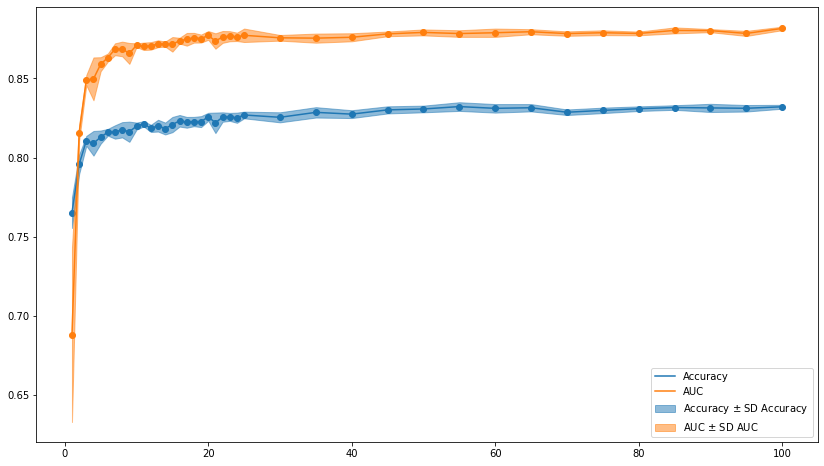

In [20]:
result = evaluate_n_epochs_through_prediction(data_train, data_test, dataset_dir = dataset_epochs_comparison_dir,
                                     n_epochs_vec = n_epochs_vec, n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
                                    save_dir = image_dir, save_path = "predictive_performance_against_n_epochs.svg",
                                             legend_pos="lower right")

In [82]:
result

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,Epochs1,0.765139,0.687973,0.009671,0.055176
1,Epochs2,0.795750,0.815595,0.006211,0.004869
2,Epochs3,0.810571,0.848965,0.003098,0.003217
3,Epochs4,0.809004,0.849735,0.007799,0.013544
4,Epochs5,0.812922,0.859003,0.004153,0.004424
5,Epochs6,0.815976,0.863185,0.002142,0.002561
6,Epochs7,0.816162,0.868443,0.004239,0.003764
7,Epochs8,0.817556,0.868657,0.004831,0.004620
8,Epochs9,0.816308,0.865819,0.006393,0.006611
9,Epochs10,0.819867,0.871027,0.002240,0.001151


In [19]:
dataset_lr_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Learning_rate_comparison")
lr_vec = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 1e-5]
path_finished_lr = ".//Python_objects//qtr_existing_lr_tracker.pkl"
n_synthetic_datasets_lr_comparison = 5
n_epochs_lr = 100

def create_tabGAN_for_lr(opt_lr):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [35]:
%run "$utils_path"
generate_multiple_datasets_for_multiple_hyperparameters(create_tabGAN_func=create_tabGAN_for_lr,
                                                        hyperparams_vec=lr_vec, n_epochs=n_epochs_lr,
                                                        dataset_dir=dataset_lr_comparison_dir,
                                                        n_synthetic_datasets=n_synthetic_datasets_lr_comparison,
                                                        restart = False, path_finished_hyperparams = path_finished_lr,
                                                        redo_hyperparams_vec = [], plot_only_new_progress = True,
                                                        hyperparams_name = "learning_rate")

Hyperparameters subfolder creation:   0%|          | 0/5 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

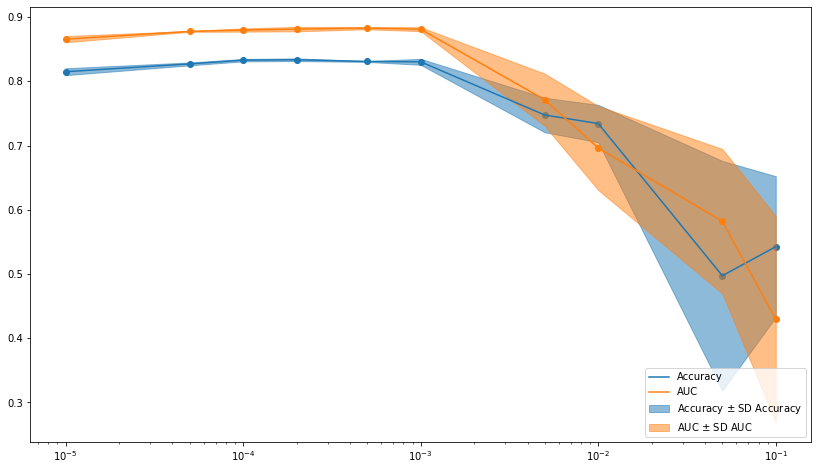

In [38]:
%run "$utils_path"
result_lr = evaluate_hyperparams_through_prediction(data_train, data_test, dataset_dir = dataset_lr_comparison_dir,
                                                 hyperparams_vec=lr_vec,
                                                    hyperparams_name = "learning_rate",
                                                 n_synthetic_datasets = n_synthetic_datasets_lr_comparison,
                                                 save_dir = image_dir,
                                                 save_path = "predictive_performance_against_lr.svg",
                                                 legend_pos="lower right", x_scale="log")

In [39]:
result_lr

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,learning_rate_0.1,0.542590,0.429805,0.109769,0.160546
1,learning_rate_0.05,0.497397,0.582190,0.178773,0.112573
2,learning_rate_0.01,0.734316,0.696274,0.029129,0.065320
3,learning_rate_0.005,0.747623,0.771309,0.026860,0.040774
4,learning_rate_0.001,0.830452,0.881271,0.004635,0.003070
5,learning_rate_0.0005,0.830983,0.882891,0.000681,0.001777
6,learning_rate_0.0002,0.833705,0.881402,0.002065,0.003449
7,learning_rate_0.0001,0.833054,0.879992,0.001889,0.002528
8,learning_rate_5e-05,0.827224,0.877832,0.002241,0.000639
9,learning_rate_1e-05,0.815060,0.865679,0.005388,0.004818


In [32]:
dataset_adam_beta1_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Adam_beta1_comparison")
adam_beta1_vec = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
path_finished_adam_beta1 = ".//Python_objects//qtr_existing_adam_beta1_tracker.pkl"
n_synthetic_datasets_adam_beta1_comparison = 5
n_epochs_adam_beta1 = 100

def create_tabGAN_for_adam_beta1(adam_beta1):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [33]:
%run "$utils_path"
generate_multiple_datasets_for_multiple_hyperparameters(create_tabGAN_func=create_tabGAN_for_adam_beta1,
                                                        hyperparams_vec=adam_beta1_vec, n_epochs=n_epochs_adam_beta1,
                                                        dataset_dir=dataset_adam_beta1_comparison_dir,
                                                        n_synthetic_datasets=n_synthetic_datasets_adam_beta1_comparison,
                                                        restart = False, path_finished_hyperparams = path_finished_adam_beta1,
                                                        redo_hyperparams_vec = [], plot_only_new_progress = True,
                                                        hyperparams_name = "Adam_beta1")

Hyperparameters subfolder creation:   0%|          | 0/1 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

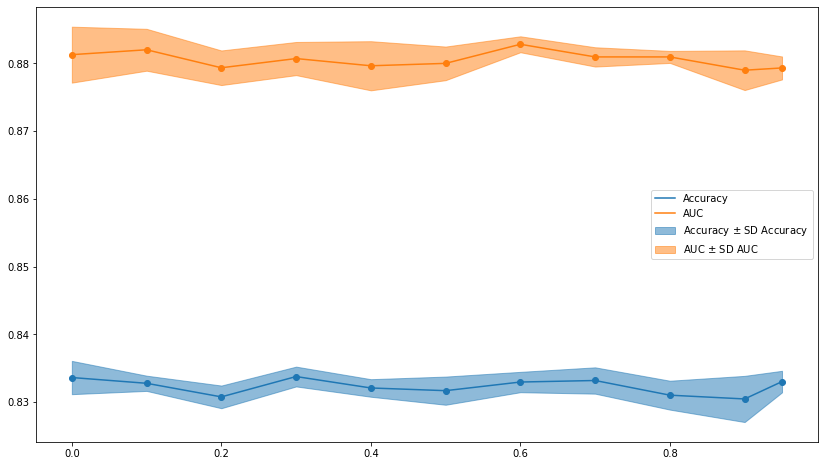

In [34]:
%run "$utils_path"
result_adam_beta1 = evaluate_hyperparams_through_prediction(data_train, data_test,
                                                            dataset_dir = dataset_adam_beta1_comparison_dir,
                                                 hyperparams_vec=adam_beta1_vec,
                                                    hyperparams_name = "Adam_beta1",
                                                 n_synthetic_datasets = n_synthetic_datasets_adam_beta1_comparison,
                                                 save_dir = image_dir,
                                                 save_path = "predictive_performance_against_adam_beta1.svg",
                                                 legend_pos="best")

In [35]:
result_adam_beta1

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,Adam_beta1_0,0.833639,0.881278,0.002455,0.004128
1,Adam_beta1_0.1,0.832789,0.882001,0.001124,0.003088
2,Adam_beta1_0.2,0.830784,0.879345,0.001672,0.002553
3,Adam_beta1_0.3,0.833785,0.880704,0.001461,0.002446
4,Adam_beta1_0.4,0.832098,0.879639,0.001296,0.003625
5,Adam_beta1_0.5,0.831700,0.879993,0.002079,0.002480
6,Adam_beta1_0.6,0.832975,0.882811,0.001500,0.001176
7,Adam_beta1_0.7,0.833201,0.880946,0.001941,0.001423
8,Adam_beta1_0.8,0.831036,0.880944,0.002132,0.000885
9,Adam_beta1_0.9,0.830478,0.878985,0.003406,0.002928


In [5]:
dataset_adam_beta2_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Adam_beta2_comparison")
adam_beta2_vec = [0.01, 0.5, 0.999]
path_finished_adam_beta2 = ".//Python_objects//qtr_existing_adam_beta2_tracker.pkl"
n_synthetic_datasets_adam_beta2_comparison = 5
n_epochs_adam_beta2 = 100

def create_tabGAN_for_adam_beta2(adam_beta2):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [6]:
%run "$utils_path"
generate_multiple_datasets_for_multiple_hyperparameters(create_tabGAN_func=create_tabGAN_for_adam_beta2,
                                                        hyperparams_vec=adam_beta2_vec, n_epochs=n_epochs_adam_beta2,
                                                        dataset_dir=dataset_adam_beta2_comparison_dir,
                                                        n_synthetic_datasets=n_synthetic_datasets_adam_beta2_comparison,
                                                        restart=False, path_finished_hyperparams=path_finished_adam_beta2,
                                                        redo_hyperparams_vec=[], plot_only_new_progress=True,
                                                        hyperparams_name = "Adam_beta2")

Hyperparameters subfolder creation:   0%|          | 0/1 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

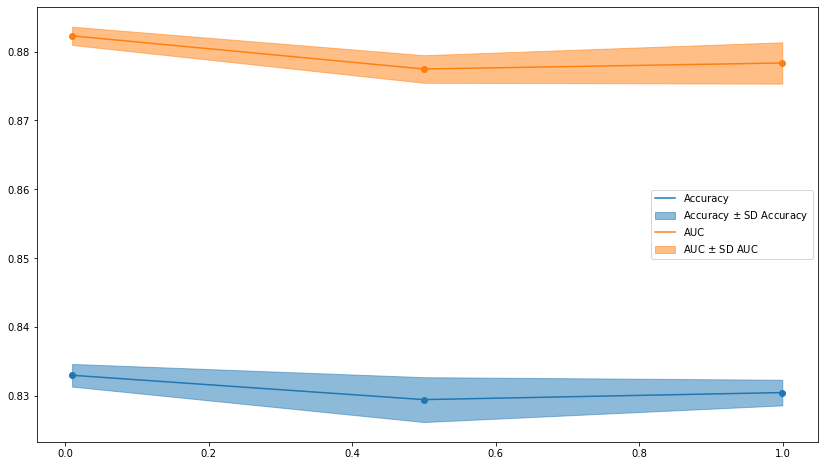

In [7]:
%run "$utils_path"
result_adam_beta2 = evaluate_hyperparams_through_prediction(data_train, data_test,
                                                            dataset_dir = dataset_adam_beta2_comparison_dir,
                                                 hyperparams_vec=adam_beta2_vec,
                                                    hyperparams_name = "Adam_beta2",
                                                 n_synthetic_datasets = n_synthetic_datasets_adam_beta2_comparison,
                                                 save_dir = image_dir,
                                                 save_path = "predictive_performance_against_adam_beta2.svg",
                                                 legend_pos="best")

In [8]:
result_adam_beta2

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,Adam_beta2_0.01,0.833028,0.882279,0.001644,0.001328
1,Adam_beta2_0.5,0.829495,0.877468,0.003253,0.002003
2,Adam_beta2_0.999,0.830518,0.878340,0.001860,0.002999
